<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Замена-пропусков" data-toc-modified-id="Замена-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Замена пропусков</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Удаление-дублей" data-toc-modified-id="Удаление-дублей-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Удаление дублей</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Изучаем-параметры" data-toc-modified-id="Изучаем-параметры-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Изучаем параметры</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Описание данных  
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м) 
- `balcony` — число балконов 
- `ceiling_height` — высота потолков (м) 
- `cityCenters_nearest` — расстояние до центра города (м) 
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия) 
- `first_day_exposition` — дата публикации 
- `floor` — этаж 
- `floors_total` — всего этажей в доме 
- `is_apartment` — апартаменты (булев тип) 
- `kitchen_area` — площадь кухни в квадратных метрах (м²) 
- `last_price` — цена на момент снятия с публикации 
- `living_area` — жилая площадь в квадратных метрах (м²) 
- `locality_name` — название населённого пункта 
- `open_plan` — свободная планировка (булев тип) 
- `parks_around3000` — число парков в радиусе 3 км 
- `parks_nearest` — расстояние до ближайшего парка (м) 
- `ponds_around3000` — число водоёмов в радиусе 3 км 
- `ponds_nearest` — расстояние до ближайшего водоёма (м) 
- `rooms` — число комнат 
- `studio` — квартира-студия (булев тип) 
- `total_area` — площадь квартиры в квадратных метрах (м²) 
- `total_images` — число фотографий квартиры в объявлении 

## Изучение данных из файла

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns

from matplotlib import pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# загрузим данные и сохраним в переменную data
#data = pd.read_csv('real_estate_data.csv', sep='\t')

# wrong - работает
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
# посмотрим на первые 5 строк датасета и проверим как загрузились данные
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


In [4]:
# посмотрим на размеры датасета
data.shape

(23699, 22)

In [5]:
data.info() # изучим общую информацию о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

В каждой строке таблицы представлены данные о квартирах. Часть переменных описывают характеристики квартиры (например, жилая площадь, тип планировки, площадь кухни, высота потолка, наличие балкона, число комнат). Другая часть представляет данные о расположении квартиры относительно центра города, наличия парков и водоемов поблизости, аэропорта. Указаны стоимость продажи (на момент снятия публикации). Также в датасете есть общая информация о доме, в котором продается квартира (число этажей). 

Задача проекта заключается в том, чтобы научиться определять рыночную стоимость объектов недвижимости. Для выясним какие факторы связаны с рыночной стоимостью объектов недвижимости. 

В данных 23699 строк и 22 переменные. Представлены три типа данных float, object и bool. Практически в половине переменных содержатся пропущенные значения. Начнем с предобработки данных.

In [6]:
# check
def pass_value(df):
    (
        (df.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = False)
        .plot(kind= 'bar', figsize=(19,3), rot = 10, legend = False)
        .set_title('Пример' + "\n", fontsize = 20, color = 'SteelBlue') # чуть добавил
    );

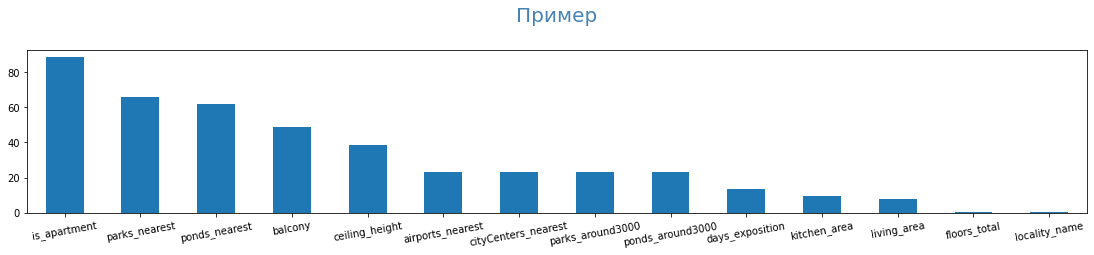

In [7]:
# check
pass_value(data)

## Предобработка данных

In [8]:
# для начала заменим название одной переменной, которые не соответсвует регистру
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

### Замена пропусков

Посмотрим внимательно по отдельности все переменные, где есть пропуски

In [9]:
# начнем с переменной общее число этажей в доме
data['floors_total'].isnull().sum()

86

Рассмотрим ближе данные. Возможно `'floors_total'` равен 1, возможно, что продавцы не указывали общее число этажей в доме ввиду того, что это может быть частный дом.

In [10]:
np.sort(data[data['floors_total'].isna()]['floor'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17, 18,
       19, 20, 21, 22, 23, 24])

Итак, видим, что этажи, на которых находятся продаваемые квартиры разные. Заменить 1 не получится. 
Посмотрим срез датасета по пропущенным значениям в 'floors_total'. И если в остальных переменных тоже будет много пропущенных значений, то удалим эти данные из обработки. (86 удаленных строчек это менее 0,5% от всех данных)

In [11]:
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,"11,640,000.00",65.20,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,"39,197.00","12,373.00",1.00,123.00,0.00,NaN,49.00
237,4,"2,438,033.00",28.10,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,...,NaN,0.00,Санкт-Петербург,"22,041.00","17,369.00",0.00,NaN,1.00,374.00,251.00
457,4,"9,788,348.00",70.80,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,...,10.63,0.00,Санкт-Петербург,"37,364.00","8,322.00",2.00,309.00,2.00,706.00,727.00
671,4,"6,051,191.00",93.60,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,...,16.80,0.00,Санкт-Петербург,"22,041.00","17,369.00",0.00,NaN,1.00,374.00,123.00
1757,5,"3,600,000.00",39.00,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,"22,735.00","11,618.00",1.00,835.00,1.00,652.00,77.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,"8,500,000.00",63.50,2017-05-24T00:00:00,2,2.80,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,"51,340.00","15,363.00",0.00,NaN,1.00,853.00,512.00
22656,4,"4,574,160.00",64.50,2017-04-02T00:00:00,2,NaN,NaN,31.70,20,NaN,...,14.40,0.00,Санкт-Петербург,"22,041.00","17,369.00",0.00,NaN,1.00,374.00,127.00
22808,0,"14,569,263.00",110.40,2016-11-20T00:00:00,3,NaN,NaN,45.38,6,NaN,...,23.42,0.00,Санкт-Петербург,"19,095.00","4,529.00",0.00,NaN,0.00,NaN,260.00
23590,0,"21,187,872.00",123.30,2017-04-25T00:00:00,3,NaN,NaN,50.40,18,NaN,...,23.60,0.00,Санкт-Петербург,"19,095.00","4,529.00",0.00,NaN,0.00,NaN,104.00


In [12]:
# посмотрим данные где не указано число этаже в доме и пустые значения в переменной "жилая площадь"
data[data['floors_total'].isna() & data['living_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1757,5,"3,600,000.00",39.00,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,"22,735.00","11,618.00",1.00,835.00,1.00,652.00,77.00
1930,1,"9,750,000.00",66.77,2016-05-13T00:00:00,2,NaN,NaN,NaN,4,NaN,...,NaN,0.00,Санкт-Петербург,"39,886.00","10,660.00",1.00,"2,276.00",3.00,244.00,90.00
3817,1,"1,640,000.00",23.98,2015-08-25T00:00:00,1,NaN,NaN,NaN,1,NaN,...,NaN,0.00,посёлок Щеглово,"61,908.00","34,085.00",0.00,NaN,0.00,NaN,378.00
3831,5,"4,850,000.00",37.40,2019-03-02T00:00:00,1,NaN,NaN,NaN,7,NaN,...,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4848,15,"13,000,000.00",98.00,2017-02-08T00:00:00,3,NaN,NaN,NaN,18,NaN,...,NaN,0.00,Санкт-Петербург,"37,625.00","14,153.00",0.00,NaN,0.00,NaN,29.00
4901,5,"2,200,000.00",24.00,2018-10-22T00:00:00,0,NaN,NaN,NaN,6,NaN,...,NaN,NaN,посёлок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,51.00
5187,5,"3,300,000.00",25.40,2018-11-02T00:00:00,0,NaN,NaN,NaN,15,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,3.00
5958,1,"3,200,000.00",30.30,2018-09-07T00:00:00,0,NaN,NaN,NaN,13,NaN,...,NaN,NaN,Санкт-Петербург,"22,735.00","11,618.00",1.00,835.00,1.00,652.00,68.00
6030,3,"10,900,000.00",116.23,2017-05-05T00:00:00,4,NaN,NaN,NaN,24,NaN,...,NaN,0.00,Санкт-Петербург,"35,234.00","14,674.00",0.00,NaN,1.00,844.00,83.00
7508,5,"6,800,000.00",45.50,2018-01-22T00:00:00,1,NaN,NaN,NaN,8,NaN,...,NaN,NaN,Санкт-Петербург,"43,058.00","13,495.00",1.00,508.00,0.00,NaN,26.00


Таким данных оказалось 33. В этих данных очень много пропущенных значений, удалим их обработки.

In [13]:
# удаление строк с пропусками в столбцах, перечисленных в списке subset
data = data.loc[(data['floors_total'].isna() == False) | (data['living_area'].isna() == False)]

In [14]:
len(data) # проверим, что верно удалилось

23666

Остальные пропущенные значения в `'floors_total'` оставим как есть. 

Теперь рассмотрим переменную `'living_area' ` - жилая площадь

In [15]:
data.loc[data['living_area'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1870 entries, 3 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          1870 non-null   int64  
 1   last_price            1870 non-null   float64
 2   total_area            1870 non-null   float64
 3   first_day_exposition  1870 non-null   object 
 4   rooms                 1870 non-null   int64  
 5   ceiling_height        794 non-null    float64
 6   floors_total          1870 non-null   float64
 7   living_area           0 non-null      float64
 8   floor                 1870 non-null   int64  
 9   is_apartment          120 non-null    object 
 10  studio                1870 non-null   bool   
 11  open_plan             1870 non-null   bool   
 12  kitchen_area          439 non-null    float64
 13  balcony               480 non-null    float64
 14  locality_name         1865 non-null   object 
 15  airports_nearest    

In [16]:
data['living_area'].describe()

count   21,796.00
mean        34.46
std         22.03
min          2.00
25%         18.60
50%         30.00
75%         42.30
max        409.70
Name: living_area, dtype: float64

In [17]:
data['living_area'].median()

30.0

В данных встречаются и аномально большие, и совсем низкие значения жилой площади. Средняя площадь - `34.5`, медианная - `30`. Пропущенных значений осталось 1870, что составляет примерно 8% от общего числа. 

Прежде чем принимать решение, что делать с пропущенными значениями (удалить или заменить), посмотрим на число комнат в таких данных и площадь кухни.

In [18]:
data.loc[data['living_area'].isna(), ['rooms', 'kitchen_area']].pivot_table(index='rooms', values='kitchen_area', aggfunc='count')

,kitchen_area
rooms,
0,0
1,137
2,165
3,109
4,19
5,7
6,1
7,1
9,0


In [19]:
np.sort(data.loc[data['living_area'].isna(), 'rooms'].unique())

array([0, 1, 2, 3, 4, 5, 6, 7, 9])

In [20]:
np.sort(data.loc[data['living_area'].isna(), 'kitchen_area'].unique())

array([ 4.  ,  5.  ,  5.5 ,  5.6 ,  5.8 ,  5.9 ,  6.  ,  6.3 ,  6.5 ,
        6.7 ,  6.8 ,  6.9 ,  7.  ,  7.2 ,  7.4 ,  7.48,  7.5 ,  7.8 ,
        7.86,  7.9 ,  8.  ,  8.1 ,  8.13,  8.2 ,  8.3 ,  8.4 ,  8.5 ,
        8.6 ,  8.65,  8.7 ,  8.71,  8.73,  8.85,  9.  ,  9.05,  9.08,
        9.22,  9.24,  9.26,  9.27,  9.3 ,  9.32,  9.38,  9.5 ,  9.52,
        9.6 ,  9.65,  9.7 ,  9.76,  9.8 ,  9.83,  9.9 ,  9.91,  9.97,
       10.  , 10.02, 10.15, 10.19, 10.2 , 10.29, 10.3 , 10.32, 10.33,
       10.36, 10.4 , 10.43, 10.44, 10.46, 10.5 , 10.51, 10.56, 10.6 ,
       10.64, 10.69, 10.7 , 10.8 , 10.94, 11.  , 11.05, 11.1 , 11.11,
       11.12, 11.14, 11.2 , 11.24, 11.27, 11.28, 11.3 , 11.4 , 11.42,
       11.43, 11.45, 11.49, 11.5 , 11.53, 11.55, 11.62, 11.63, 11.67,
       11.69, 11.7 , 11.71, 11.78, 11.8 , 11.9 , 11.93, 11.98, 12.  ,
       12.14, 12.15, 12.2 , 12.27, 12.3 , 12.35, 12.4 , 12.47, 12.5 ,
       12.69, 12.75, 12.9 , 12.96, 13.  , 13.1 , 13.2 , 13.3 , 13.43,
       13.53, 13.6 ,

In [21]:
data.loc[data['living_area'].isna(), 'kitchen_area'].isna().sum()

1431

In [22]:
np.sort(data.loc[(data['living_area'].isna() & data['kitchen_area'].isna()), 'rooms'].unique())

array([0, 1, 2, 3, 4, 5, 6, 7, 9])

In [23]:
data.loc[(data['living_area'].isna() & data['kitchen_area'].isna()), 'rooms'].value_counts()

1    510
2    469
3    333
4     71
5     26
0     11
6      5
7      5
9      1
Name: rooms, dtype: int64

In [24]:
data.loc[(data['living_area'].isna() & data['kitchen_area'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
30,12,"2,200,000.00",32.80,2018-02-19T00:00:00,1,NaN,9.00,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.00
37,10,"1,990,000.00",45.80,2017-10-28T00:00:00,2,2.50,5.00,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.00
44,13,"5,350,000.00",40.00,2018-11-18T00:00:00,1,NaN,22.00,NaN,3,NaN,...,NaN,1.00,Санкт-Петербург,"30,471.00","11,603.00",1.00,620.00,1.00,"1,152.00",NaN
59,15,"6,300,000.00",46.50,2017-03-06T00:00:00,1,NaN,13.00,NaN,13,NaN,...,NaN,NaN,Санкт-Петербург,"11,125.00","14,501.00",0.00,NaN,0.00,NaN,336.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23632,20,"5,000,000.00",38.00,2018-06-23T00:00:00,1,2.55,16.00,NaN,15,NaN,...,NaN,1.00,Санкт-Петербург,"31,118.00","7,257.00",1.00,241.00,1.00,230.00,113.00
23642,14,"5,950,000.00",80.30,2018-07-03T00:00:00,3,2.70,12.00,NaN,5,NaN,...,NaN,NaN,Колпино,"27,933.00","33,719.00",0.00,NaN,2.00,562.00,60.00
23663,12,"6,400,000.00",88.00,2018-01-12T00:00:00,4,2.55,10.00,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,"33,642.00","13,943.00",0.00,NaN,2.00,844.00,59.00
23670,9,"2,450,000.00",45.60,2018-02-08T00:00:00,1,2.80,9.00,NaN,2,NaN,...,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.00


In [25]:
data.describe() # рассмотрим статистику по всем числовым параметрам

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,666.00","23,666.00","23,666.00","23,666.00","14,501.00","23,613.00","21,796.00","23,666.00","21,421.00","12,162.00","18,130.00","18,153.00","18,154.00","8,066.00","18,154.00","9,093.00","20,488.00"
mean,9.87,"6,541,772.76",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,790.02","14,191.03",0.61,490.32,0.77,518.01,180.89
std,5.68,"10,893,471.96",35.66,1.08,1.26,6.60,22.03,4.88,5.91,1.07,"12,627.25","8,610.44",0.80,341.10,0.94,277.70,219.59
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,582.75","9,234.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.00",0.00,454.50,1.00,502.00,96.00
75%,14.00,"6,799,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,268.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


Получается, что в данных представлены так или иначе полностью число комнат. Но данные по площади кухни И по жилой площади отсутствуют у 1431 объявлений (примерно 6% от оставшихся данных). Поскольку отношения между площадью кухни и жилой площадью важны для исследовательского анализа, то предлагаю удалить эти данные из анализа. 
Заменить пропуски средний или медианным значением кажется довольно сложным. Определить по цене или по общей площади пока не представляется возможным. 

Пустые значения в переменной `balcony` кажется логичным заменить на 0, а в  `ceiling_height` заменить на медианное значение, `is_apartment` тоже кажется разумным заменить на 0 (нет). Когда рассмотрим поближе эти переменные тогда примем решение. 

Важным кажется понять чем заменить пустые значения в `'living_area'` и `'kitchen_area'`. 
Сначала решим, как заменить пропуски в `'living_area'`.
Рассмотрим при помощи `describe()` на описательную статистику. 

In [26]:
data.loc[data['living_area'].isna(), ['total_area', 'rooms', 'kitchen_area']].describe()

,total_area,rooms,kitchen_area
count,"1,870.00","1,870.00",439.00
mean,63.43,2.06,13.09
std,45.27,1.05,7.96
min,13.00,0.00,4.00
25%,41.00,1.00,8.70
50%,53.00,2.00,10.94
75%,71.00,3.00,14.22
max,631.00,9.00,60.00


Видно, что среднее и медианное значения для площадей сильно разнятся. Кажется разумным, поделить нашу подвыборку на 4 квартиля по `'total_area'`, изучить среднюю и медианную площади, и взять одно из этих значений для замены пропусков в `'living_area'`.

In [27]:
data['area_label'] = pd.qcut(data['total_area'], q=4, labels=['маленькая', 'ниже медианного', 'выше медианного', 'большая'])

In [28]:
data.loc[data['area_label'] == 'маленькая', ['total_area', 'rooms', 'kitchen_area']].describe()

,total_area,rooms,kitchen_area
count,"6,029.00","6,029.00","5,217.00"
mean,33.92,0.99,8.34
std,4.11,0.24,2.28
min,12.00,0.00,1.30
25%,31.10,1.00,6.50
50%,34.00,1.00,8.25
75%,37.00,1.00,10.00
max,40.00,5.00,26.00


In [29]:
data.loc[data['area_label'] == 'ниже медианного', ['total_area', 'rooms', 'kitchen_area']].describe()

,total_area,rooms,kitchen_area
count,"5,909.00","5,909.00","5,420.00"
mean,45.61,1.71,8.81
std,3.30,0.59,3.32
min,40.08,0.00,3.20
25%,43.00,1.00,6.20
50%,45.00,2.00,8.00
75%,48.00,2.00,10.80
max,52.00,4.00,32.00


In [30]:
data.loc[data['area_label'] == 'выше медианного', ['total_area', 'rooms', 'kitchen_area']].describe()

,total_area,rooms,kitchen_area
count,"5,815.00","5,815.00","5,350.00"
mean,60.06,2.38,9.73
std,4.71,0.58,3.67
min,52.03,0.00,2.89
25%,56.00,2.00,7.10
50%,60.00,2.00,9.00
75%,63.80,3.00,11.00
max,69.90,5.00,50.00


In [31]:
data.loc[data['area_label'] == 'большая', ['total_area', 'rooms', 'kitchen_area']].describe()

,total_area,rooms,kitchen_area
count,"5,913.00","5,913.00","5,434.00"
mean,102.33,3.23,15.29
std,48.45,1.07,8.80
min,70.00,0.00,5.00
25%,76.00,3.00,10.00
50%,87.00,3.00,13.00
75%,108.00,4.00,17.00
max,900.00,19.00,112.00


Итак, видим, что для домов, где общая площадь не относится к категории "большая", в них среднее не сильно отличается от медианного. Проведем замену пропусков на медианное значение по этим категориям.

       
Для чистоты эксперимента, прежде чем проверить, что после заполнения данных у нас не оказалось логических ошибок, я решила проверить, а не было ли таких ошибок в самом начале. 
Поэтому я решила скопировать исходных датасет в новый без миссингов, и проверить есть ли там такие логические ошиби. Если есть, то проверить почему, например, в этих квартирах нет балконов. 

In [32]:
data2 = data.dropna(subset=['living_area','kitchen_area']).copy()

In [33]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20982 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   total_images          20982 non-null  int64   
 1   last_price            20982 non-null  float64 
 2   total_area            20982 non-null  float64 
 3   first_day_exposition  20982 non-null  object  
 4   rooms                 20982 non-null  int64   
 5   ceiling_height        13336 non-null  float64 
 6   floors_total          20943 non-null  float64 
 7   living_area           20982 non-null  float64 
 8   floor                 20982 non-null  int64   
 9   is_apartment          2537 non-null   object  
 10  studio                20982 non-null  bool    
 11  open_plan             20982 non-null  bool    
 12  kitchen_area          20982 non-null  float64 
 13  balcony               11218 non-null  float64 
 14  locality_name         20943 non-null  object  
 15  ai

In [34]:
data2['check'] = data['total_area']*0.9 >= (data['living_area'] + data['kitchen_area'])

In [35]:
data2.loc[data2['check'] == False, ['total_area', 'living_area', 'kitchen_area', 'balcony']]

,total_area,living_area,kitchen_area,balcony
41,74.00,59.00,12.00,5.00
171,49.00,38.00,10.00,1.00
184,30.20,26.10,6.20,NaN
220,37.00,28.00,9.00,NaN
319,59.70,47.40,6.40,1.00
...,...,...,...,...
23216,114.00,90.20,16.00,NaN
23297,48.20,42.20,6.00,1.00
23328,54.00,40.00,10.00,0.00
23521,65.00,44.00,15.30,NaN


In [ ]:
# check
data2[data2['total_area']*0.9 <= (data2['living_area'] + data2['kitchen_area'])]

Итак, в исходных данных 462 строки, которые никак не удовлетворяют условию `total_area*0.9 >= (living_area + kitchen_area)`. Причем, у части из них нет балконов, а у части их них есть. Хм...

In [37]:
data2.loc[(data2['check'] == False) & (data2['balcony'] >= 1), ['total_area', 'living_area', 'kitchen_area', 'balcony']]

,total_area,living_area,kitchen_area,balcony
41,74.00,59.00,12.00,5.00
171,49.00,38.00,10.00,1.00
319,59.70,47.40,6.40,1.00
491,66.10,43.60,17.20,1.00
511,69.00,13.00,50.00,1.00
...,...,...,...,...
22869,25.00,14.00,11.00,5.00
22963,102.00,78.00,24.00,1.00
23108,33.95,21.68,12.00,2.00
23139,81.00,64.00,13.00,2.00


151 значение в датасете, где есть в квартирах балконы (даже больше 1), и при этом не выполняется условие `total_area*0.9 >= (living_area + kitchen_area)`. Может быть тогда смягчить условие и сделать таким `total_area*0.95 >= (living_area + kitchen_area)` 

In [38]:
data2['check'] = data['total_area']*0.95 >= (data['living_area'] + data['kitchen_area'])

In [39]:
data2.loc[data2['check'] == False, ['total_area', 'living_area', 'kitchen_area', 'balcony']]

,total_area,living_area,kitchen_area,balcony
41,74.00,59.00,12.00,5.00
171,49.00,38.00,10.00,1.00
184,30.20,26.10,6.20,NaN
220,37.00,28.00,9.00,NaN
545,23.80,20.00,5.00,NaN
...,...,...,...,...
23108,33.95,21.68,12.00,2.00
23139,81.00,64.00,13.00,2.00
23202,67.92,63.00,13.04,NaN
23297,48.20,42.20,6.00,1.00


Осталось 230 значений. 

In [40]:
data2.loc[(data2['check'] == False) & (data2['balcony'] >= 1), ['total_area', 'living_area', 'kitchen_area', 'balcony']]

,total_area,living_area,kitchen_area,balcony
41,74.00,59.00,12.00,5.00
171,49.00,38.00,10.00,1.00
551,31.59,30.55,9.28,2.00
601,53.70,48.30,7.00,2.00
696,34.69,23.43,23.43,2.00
...,...,...,...,...
22869,25.00,14.00,11.00,5.00
22963,102.00,78.00,24.00,1.00
23108,33.95,21.68,12.00,2.00
23139,81.00,64.00,13.00,2.00


А с балконами 98. Давайте проверим, что эти данные удовляетворяют условию `total_area >= (living_area + kitchen_area)` 

In [41]:
data3 = (data2.loc[(data2['check'] == False) & (data2['balcony'] >= 1), ['total_area', 'living_area', 'kitchen_area', 'balcony']]).copy()
data3['check'] = data3['total_area'] >= (data3['living_area'] + data3['kitchen_area'])

data3.loc[(data3['check'] == False), ]

,total_area,living_area,kitchen_area,balcony,check
551,31.59,30.55,9.28,2.00,False
601,53.70,48.30,7.00,2.00,False
696,34.69,23.43,23.43,2.00,False
1060,50.00,39.00,20.50,2.00,False
1354,54.50,38.00,19.00,2.00,False
1992,37.40,36.40,8.60,1.00,False
3426,32.51,28.85,7.89,2.00,False
3891,70.40,68.10,9.00,3.00,False
4366,47.70,39.80,28.20,1.00,False
6559,26.00,20.00,8.00,1.00,False


In [42]:
data3.loc[(data3['check'] == False)].shape[0]

38

М-да, все-таки есть остаются значения, где суммарная площадь жилой зоны и зоны кухни больше чем общая площадь. Тут явно какие-то ошибки, может быть пользовательские при вводе данных. Я бы предпочла избавиться от таких данных в датасете, их всего 38. Но давайте проверим корректность и для квартир, где нет баклонов или не указано их число.

In [43]:
data3 = (data2.loc[(data2['check'] == False) & (data2['balcony'] < 1), ['total_area', 'living_area', 'kitchen_area', 'balcony']]).copy()
data3['check'] = data3['total_area'] >= (data3['living_area'] + data3['kitchen_area'])

data3.loc[(data3['check'] == False)] # 6 записей 

,total_area,living_area,kitchen_area,balcony,check
2950,35.00,33.00,8.50,0.00,False
11150,42.30,37.70,5.40,0.00,False
11579,33.00,26.00,26.00,0.00,False
17492,29.00,26.00,8.00,0.00,False
19908,36.00,28.00,9.00,0.00,False
21915,91.40,62.00,32.40,0.00,False


In [44]:
data3 = (data2.loc[(data2['check'] == False) & (data2['balcony'].isna()), ['total_area', 'living_area', 'kitchen_area', 'balcony']]).copy()
data3['check'] = data3['total_area'] >= (data3['living_area'] + data3['kitchen_area'])

data3.loc[(data3['check'] == False)].shape[0]

20

Таким строк 6+20+38=64, что менее 0,05% данных. Смело удалим такие данные из исходного датасета.

In [45]:
data = (
    (data.loc[~(((data['total_area'] >= (data['living_area'] + data['kitchen_area'])) == False) &
            (data['living_area'].isna() == False) & (data['kitchen_area'].isna() == False))]).copy()
)

In [46]:
data.shape[0]

23602

Проведем замены.

In [47]:
data.loc[data['area_label'] == 'маленькая', 'living_area'] = data.loc[data['area_label'] == 'маленькая', 'living_area'].fillna(data['living_area'].median())

In [48]:
data.loc[data['area_label'] == 'ниже медианного', 'living_area'] = data.loc[data['area_label'] == 'ниже медианного', 'living_area'].fillna(data['living_area'].median())

In [49]:
data.loc[data['area_label'] == 'выше медианного', 'living_area'] = data.loc[data['area_label'] == 'выше медианного', 'living_area'].fillna(data['living_area'].median())

Произвели замены данных выше. Теперь более подробно рассмотрим группу "большая". Скопируем в отдельный датасет.

In [50]:
data_cut = data.loc[data['area_label'] == 'большая'].copy()

In [51]:
data_cut['big_area_label'] = pd.qcut(data_cut['total_area'], q=3, labels=['самые маленькие среди больших', 'средние', 'самые большие'])

In [52]:
data_cut[data_cut['big_area_label']=='самые маленькие среди больших'].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"1,968.00","1,968.00","1,968.00","1,968.00","1,275.00","1,964.00","1,811.00","1,968.00","1,814.00","1,011.00","1,506.00","1,509.00","1,509.00",719.00,"1,509.00",798.00,"1,664.00"
mean,10.54,"7,228,702.03",74.12,2.79,2.82,10.49,44.22,5.66,11.46,1.28,"29,549.52","13,499.64",0.67,497.12,0.88,513.14,192.85
std,5.76,"3,231,953.50",2.79,0.61,0.87,6.46,6.57,4.76,4.45,1.24,"11,993.56","8,705.19",0.83,372.50,1.03,271.67,223.50
min,0.00,"850,000.00",70.00,0.00,2.40,2.00,5.40,1.00,5.00,0.00,"7,399.00",318.00,0.00,13.00,0.00,16.00,3.00
25%,6.00,"5,400,000.00",72.00,2.00,2.60,5.00,40.90,2.00,8.50,0.00,"20,307.75","7,306.00",0.00,288.00,0.00,289.25,53.00
50%,10.00,"6,750,000.00",74.00,3.00,2.70,9.00,44.60,4.00,10.25,1.00,"27,653.00","12,217.00",0.00,448.00,1.00,521.00,113.00
75%,15.00,"8,400,000.00",76.10,3.00,3.00,14.00,48.20,8.00,13.00,2.00,"36,813.00","15,976.00",1.00,613.50,1.00,723.75,240.25
max,50.00,"39,744,000.00",79.60,5.00,32.00,36.00,70.00,30.00,39.70,5.00,"72,469.00","53,568.00",3.00,"3,064.00",3.00,"1,275.00","1,513.00"


In [53]:
data_cut[data_cut['big_area_label']=='средние'].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"1,969.00","1,969.00","1,969.00","1,969.00","1,264.00","1,963.00","1,819.00","1,969.00","1,819.00",970.00,"1,741.00","1,741.00","1,742.00",851.00,"1,742.00","1,020.00","1,617.00"
mean,10.77,"9,527,966.82",87.65,2.99,2.95,11.27,51.12,6.10,14.00,1.40,"27,947.12","11,948.86",0.68,515.11,0.98,495.99,233.32
std,6.29,"4,438,013.03",5.67,0.62,1.38,6.81,8.89,4.96,5.65,1.43,"11,157.87","8,394.00",0.84,400.76,1.04,272.88,260.80
min,0.00,"990,000.00",79.70,0.00,2.00,1.00,13.00,1.00,5.00,0.00,"7,016.00",318.00,0.00,13.00,0.00,13.00,3.00
25%,6.00,"6,850,000.00",82.60,3.00,2.70,5.00,46.65,2.00,10.50,0.00,"20,138.00","5,314.00",0.00,254.00,0.00,277.75,60.00
50%,10.00,"8,600,000.00",87.00,3.00,2.80,9.00,51.00,4.00,12.80,1.00,"25,256.00","11,087.00",0.00,456.00,1.00,480.00,133.00
75%,16.00,"11,100,000.00",92.50,3.00,3.00,16.00,56.40,8.00,15.40,2.00,"35,555.00","15,250.00",1.00,641.00,2.00,700.00,323.00
max,50.00,"53,000,000.00",98.40,6.00,32.00,36.00,88.00,26.00,49.40,5.00,"73,827.00","54,926.00",3.00,"2,847.00",3.00,"1,313.00","1,572.00"


In [54]:
data_cut[data_cut['big_area_label']=='самые большие'].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"1,965.00","1,965.00","1,965.00","1,965.00","1,337.00","1,957.00","1,776.00","1,965.00","1,790.00",901.00,"1,871.00","1,880.00","1,880.00","1,186.00","1,880.00","1,186.00","1,494.00"
mean,11.27,"23,062,459.77",145.42,3.93,3.09,9.32,83.99,5.63,20.42,1.20,"27,778.82","8,744.87",0.99,470.47,1.14,456.17,288.09
std,6.58,"32,224,550.36",64.44,1.40,0.39,6.12,39.66,4.62,11.78,1.40,"9,507.78","7,673.40",0.97,345.70,1.11,275.45,288.72
min,0.00,"12,190.00",98.50,0.00,2.50,1.00,3.00,1.00,5.00,0.00,"9,222.00",181.00,0.00,9.00,0.00,16.00,3.00
25%,6.00,"11,500,000.00",108.10,3.00,2.80,5.00,60.90,3.00,13.21,0.00,"21,946.00","4,234.25",0.00,267.00,0.00,215.00,87.00
50%,11.00,"15,357,000.00",123.20,4.00,3.00,7.00,73.55,4.00,16.80,1.00,"25,257.00","5,881.00",1.00,441.00,1.00,433.00,182.00
75%,17.00,"23,800,000.00",156.60,4.00,3.30,12.00,93.70,7.00,23.18,2.00,"32,888.00","11,907.25",2.00,578.00,2.00,662.75,403.75
max,50.00,"763,000,000.00",900.00,19.00,6.00,35.00,409.70,33.00,112.00,5.00,"73,547.00","54,646.00",3.00,"3,013.00",3.00,"1,293.00","1,512.00"


Все равно остаются загвоздки с группой самых больших. А что если посмотреть описательную статистику по 30% самых больших

In [55]:
data_cut.loc[:,['total_area', 'living_area', 'kitchen_area']].describe(percentiles=[7/10, 3/4, 1])

,total_area,living_area,kitchen_area
count,"5,902.00","5,406.00","5,423.00"
mean,102.37,59.61,15.27
std,48.49,29.27,8.79
min,70.00,3.00,5.00
50%,87.00,51.30,13.00
70%,101.40,60.00,15.85
75%,108.00,64.00,17.00
100%,900.00,409.70,112.00
max,900.00,409.70,112.00


In [56]:
data_cut['big_area_label'] = pd.qcut(data_cut['total_area'], q=[0, 7/10, 1], labels=['большие', 'самые большие'])

In [57]:
data_cut[data_cut['big_area_label']=='большие'].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"4,133.00","4,133.00","4,133.00","4,133.00","2,674.00","4,121.00","3,811.00","4,133.00","3,812.00","2,070.00","3,430.00","3,435.00","3,436.00","1,676.00","3,436.00","1,930.00","3,435.00"
mean,10.69,"8,559,398.84",81.79,2.90,2.89,10.89,48.13,5.91,12.92,1.34,"28,650.97","12,594.02",0.69,504.41,0.94,502.28,213.34
std,6.02,"4,191,684.71",8.90,0.63,1.13,6.69,8.87,4.91,5.46,1.35,"11,536.02","8,554.23",0.84,382.67,1.04,273.61,243.19
min,0.00,"850,000.00",70.00,0.00,2.00,1.00,5.40,1.00,5.00,0.00,"7,016.00",215.00,0.00,13.00,0.00,13.00,3.00
25%,6.00,"6,000,000.00",74.00,3.00,2.64,5.00,43.00,2.00,9.20,0.00,"20,145.25","5,880.00",0.00,276.00,0.00,277.00,58.00
50%,10.00,"7,777,000.00",80.00,3.00,2.75,9.00,48.00,4.00,11.80,1.00,"26,182.00","11,691.00",0.00,454.00,1.00,495.00,120.00
75%,15.00,"10,000,000.00",88.70,3.00,3.00,16.00,53.20,8.00,15.00,2.00,"36,339.00","15,593.50",1.00,622.00,2.00,709.00,285.00
max,50.00,"53,000,000.00",101.40,7.00,32.00,36.00,89.10,33.00,55.70,5.00,"73,827.00","54,926.00",3.00,"3,064.00",3.00,"1,313.00","1,572.00"


In [58]:
data_cut[data_cut['big_area_label']=='самые большие'].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"1,769.00","1,769.00","1,769.00","1,769.00","1,202.00","1,763.00","1,595.00","1,769.00","1,611.00",812.00,"1,688.00","1,695.00","1,695.00","1,080.00","1,695.00","1,074.00","1,340.00"
mean,11.25,"24,267,038.04",150.46,4.01,3.11,9.12,87.02,5.54,20.85,1.19,"27,759.98","8,468.33",1.01,470.72,1.15,453.46,295.33
std,6.66,"33,703,780.28",66.02,1.43,0.40,5.93,40.61,4.47,12.05,1.39,"9,366.06","7,574.74",0.97,350.77,1.11,273.56,293.12
min,0.00,"12,190.00",101.57,0.00,2.50,1.00,3.00,1.00,5.00,0.00,"9,222.00",181.00,0.00,9.00,0.00,16.00,3.00
25%,6.00,"12,000,000.00",112.00,3.00,2.80,5.00,64.00,3.00,13.50,0.00,"22,139.00","4,172.00",0.00,270.00,0.00,215.00,90.00
50%,11.00,"16,000,000.00",128.00,4.00,3.00,6.00,76.40,4.00,17.00,1.00,"25,239.00","5,735.00",1.00,441.00,1.00,427.00,191.00
75%,17.00,"25,000,000.00",161.80,5.00,3.30,12.00,96.35,7.00,23.90,2.00,"32,753.25","11,181.50",2.00,578.00,2.00,658.75,416.25
max,50.00,"763,000,000.00",900.00,19.00,6.00,27.00,409.70,25.00,112.00,5.00,"73,547.00","54,646.00",3.00,"3,013.00",3.00,"1,293.00","1,512.00"


In [59]:
data_cut[data_cut['big_area_label']=='самые большие'].shape

(1769, 24)

Удивительные самые большие группы все-таки остаются. Неясно как лучше произвести замену пропусков. У группы 'большие' сделаем замену на медианное значение.

In [60]:
data['big_area_label'] = pd.qcut(data.loc[data['area_label'] == 'большая','total_area'], q=[0, 7/10, 1], labels=['большие', 'самые большие'])

In [61]:
data.loc[data['big_area_label'] == 'большие', 'living_area'] =  data.loc[data['big_area_label'] == 'большие', 'living_area'].fillna(data['living_area'].median())

Поскольку есть вероятность того, что могут возникнуть логические ошибки вроде таких, что суммарная полащдь кухни и жилой будет большей общей площади. Поэтому я приняла решение заменить пропуски по такому принципу:
        `kitchen_area = total_area*0.95 - living_area`

In [62]:
data.loc[data['area_label'] == 'маленькая', 'kitchen_area'] = (
    data.loc[data['area_label'] == 'маленькая', 'kitchen_area'].fillna(data['total_area']*0.95 - data['living_area'])
)
data.loc[data['area_label'] == 'ниже медианного', 'kitchen_area'] = (
    data.loc[data['area_label'] == 'ниже медианного', 'kitchen_area'].fillna(data['total_area']*0.95 - data['living_area'])
)
data.loc[data['area_label'] == 'выше медианного', 'kitchen_area'] = (
    data.loc[data['area_label'] == 'выше медианного', 'kitchen_area'].fillna(data['total_area']*0.95 - data['living_area'])
)

data.loc[data['big_area_label'] == 'большие', 'kitchen_area'] =  (
    data.loc[data['big_area_label'] == 'большие', 'kitchen_area'].fillna(data['total_area']*0.95 - data['living_area'])
)

In [63]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9143
floors_total               53
living_area               174
floor                       0
is_apartment            20844
studio                      0
open_plan                   0
kitchen_area              158
balcony                 11484
locality_name              49
airports_nearest         5516
city_centers_nearest     5493
parks_around3000         5492
parks_nearest           15554
ponds_around3000         5492
ponds_nearest           14527
days_exposition          3170
area_label                  0
big_area_label          17700
dtype: int64

In [64]:
# посмотрим оставшиеся 174 значения
data.loc[(data['big_area_label']=='самые большие') & data['living_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_label,big_area_label
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,большая,самые большие
276,5,"23,900,000.00",108.40,2018-11-15T00:00:00,3,3.06,7.00,NaN,6,NaN,...,Санкт-Петербург,"26,819.00","5,026.00",1.00,657.00,1.00,678.00,96.00,большая,самые большие
581,20,"65,000,000.00",365.00,2019-03-18T00:00:00,7,2.90,7.00,NaN,7,NaN,...,Санкт-Петербург,"19,827.00","1,690.00",3.00,378.00,3.00,58.00,NaN,большая,самые большие
643,6,"33,300,000.00",109.30,2018-02-16T00:00:00,2,3.10,6.00,NaN,5,NaN,...,Санкт-Петербург,"32,859.00","5,951.00",1.00,784.00,3.00,103.00,33.00,большая,самые большие
786,6,"18,010,000.00",137.00,2017-10-18T00:00:00,3,3.10,19.00,NaN,17,NaN,...,Санкт-Петербург,"18,995.00","4,837.00",0.00,NaN,0.00,NaN,NaN,большая,самые большие
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22705,16,"20,338,132.00",132.65,2018-02-13T00:00:00,4,3.30,5.00,NaN,1,NaN,...,Санкт-Петербург,"17,462.00","16,465.00",1.00,"1,205.00",2.00,97.00,308.00,большая,самые большие
22737,6,"21,501,000.00",147.98,2019-02-24T00:00:00,4,3.08,11.00,NaN,1,NaN,...,Санкт-Петербург,"31,744.00","4,836.00",0.00,NaN,3.00,153.00,NaN,большая,самые большие
22798,11,"8,100,000.00",110.00,2018-11-10T00:00:00,5,NaN,5.00,NaN,1,NaN,...,посёлок Шушары,"17,746.00","30,888.00",0.00,NaN,0.00,NaN,25.00,большая,самые большие
22834,6,"21,600,000.00",141.00,2016-12-22T00:00:00,2,3.00,11.00,NaN,11,NaN,...,Санкт-Петербург,"31,744.00","4,836.00",0.00,NaN,3.00,153.00,479.00,большая,самые большие


Итак, остается 174 пропуска в переменной `living_area` и 158 пропусков в `kitchen_area`, оставим их как есть. 



Произведем замены пропусков в переменных `is_apartment` и `balcony`. 

In [65]:
# избавимся от лишних переменных
data.drop(columns = ['area_label', 'big_area_label'], inplace=True)

In [66]:
data.loc[:,['is_apartment', 'balcony']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23602 entries, 0 to 23698
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_apartment  2758 non-null   object 
 1   balcony       12118 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.0+ MB


In [67]:
data['balcony'].unique() # рассмотрим какие есть значения в этой переменной

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [68]:
data.loc[data['balcony'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
10,5,"5,050,000.00",39.60,2017-11-16T00:00:00,1,2.67,12.00,20.30,3,NaN,...,8.50,NaN,Санкт-Петербург,"38,357.00","13,878.00",1.00,310.00,2.00,553.00,137.00
16,11,"6,700,000.00",82.00,2017-11-23T00:00:00,3,3.05,5.00,55.60,1,NaN,...,9.00,NaN,Санкт-Петербург,"22,108.00","10,698.00",3.00,420.00,0.00,NaN,397.00
19,16,"14,200,000.00",121.00,2019-01-09T00:00:00,3,2.75,16.00,76.00,8,NaN,...,12.00,NaN,Санкт-Петербург,"38,900.00","12,843.00",0.00,NaN,0.00,NaN,97.00
23,11,"2,950,000.00",32.00,2016-10-29T00:00:00,1,2.60,9.00,17.70,9,NaN,...,6.10,NaN,Санкт-Петербург,"15,414.00","14,211.00",2.00,517.00,1.00,190.00,615.00
26,6,"4,050,000.00",60.00,2017-04-28T00:00:00,4,NaN,5.00,43.00,4,NaN,...,7.00,NaN,Санкт-Петербург,"11,580.00","10,510.00",0.00,NaN,1.00,95.00,265.00
30,12,"2,200,000.00",32.80,2018-02-19T00:00:00,1,NaN,9.00,30.00,2,NaN,...,1.16,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.00


In [69]:
data['balcony'] = data['balcony'].fillna(0) # заполним 0 - отсутствует балкон

In [70]:
# посмотрим на переменную 'is_apartment'
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [71]:
data.loc[data['is_apartment'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,0.00,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,0.00,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,...,9.10,0.00,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,...,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,NaN,0.00,NaN,155.00
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,NaN,24.00,30.00,22,NaN,...,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,NaN
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,...,8.81,0.00,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,...,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,NaN,0.00,NaN,289.00


In [72]:
data['is_apartment'] = data['is_apartment'].fillna(False) 

Вероятно, что следует миссинги в `'is_apartment'` заменить на `'False'` - отсутсвует. Возможно продавцы при заполнении не стали заполнять эту графу, поскольку жилье не относится к апартаментам. 

Затем в разделе "Изменение типов данных" заменим тип этой переменной на `bool` значение.

Далее взглянем на переменную `ceiling_height` - высота потолка

In [73]:
data.pivot_table(index='rooms', values='ceiling_height', aggfunc='median')

,ceiling_height
rooms,
0,2.75
1,2.64
2,2.60
3,2.65
4,2.80
5,3.10
6,3.20
7,3.38
8,3.42


In [74]:
data.pivot_table(index='rooms', values='ceiling_height', aggfunc='median').mean()

ceiling_height   3.05
dtype: float64

In [75]:
data.pivot_table(index='rooms', values='ceiling_height', aggfunc='median').median()

ceiling_height   3.12
dtype: float64

In [76]:
data['ceiling_height'].describe()

count   14,459.00
mean         2.77
std          1.23
min          1.00
25%          2.51
50%          2.65
75%          2.80
max        100.00
Name: ceiling_height, dtype: float64

Судя по сводной таблице, среднее и медианное значения приблизительно равно 3. Но судя по описательной статистике, максимальное значение равно 100. Возможно это аномалия. Давайте взглянем подробнее.

Посмотрим сводную таблицу, где укажем максимальные значения по высоте потолков.

In [77]:
data.pivot_table(index='rooms', values='ceiling_height', aggfunc='max')

,ceiling_height
rooms,
0,27.00
1,100.00
2,32.00
3,32.00
4,27.00
5,5.60
6,5.20
7,4.65
8,4.00


Итак, у нас имеется в продаже жилье, где высота потолоков достигает 27 и выше метров. Выглядит довольно странно.
Поскольку в элитных пентхаусах высота потолков может достигать до 10 метров, как пишут некоторые источники (https://elitnoe.ru/articles/991-top-5-elitnyh-kvartir-s-vysotoy-potolkov-ot-5-do-10-metrov), то предлагаю исключить из анализа данные, в которых высота столбцов указана выше, чем 10 м. Но для начала посмотрим, сколько таких значений.

In [78]:
data[data['ceiling_height'] > 10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,"3,600,000.00",55.20,2018-07-12T00:00:00,2,25.00,5.00,32.00,2,False,...,20.44,2.00,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.00
3148,14,"2,900,000.00",75.00,2018-11-12T00:00:00,3,32.00,3.00,53.00,2,False,...,8.00,0.00,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,0,"4,300,000.00",45.00,2018-02-01T00:00:00,2,25.00,9.00,30.00,2,False,...,7.00,1.00,Санкт-Петербург,"12,016.00","13,256.00",1.00,658.00,1.00,331.00,181.00
4876,7,"3,000,000.00",25.00,2017-09-27T00:00:00,0,27.00,25.00,17.00,17,False,...,6.75,2.00,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.00
5076,0,"3,850,000.00",30.50,2018-10-03T00:00:00,1,24.00,5.00,19.50,1,True,...,5.50,0.00,Санкт-Петербург,"29,686.00","8,389.00",3.00,397.00,1.00,578.00,7.00
5246,0,"2,500,000.00",54.00,2017-10-13T00:00:00,2,27.00,5.00,30.00,3,False,...,9.00,2.00,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.00
5669,4,"4,400,000.00",50.00,2017-08-08T00:00:00,2,26.00,9.00,21.30,3,False,...,7.00,2.00,Санкт-Петербург,"28,981.00","10,912.00",1.00,305.00,0.00,NaN,267.00
5807,17,"8,150,000.00",80.00,2019-01-09T00:00:00,2,27.00,36.00,41.00,13,False,...,12.00,5.00,Санкт-Петербург,"18,732.00","20,444.00",0.00,NaN,3.00,80.00,38.00
6246,6,"3,300,000.00",44.40,2019-03-25T00:00:00,2,25.00,5.00,31.30,5,False,...,5.70,0.00,Кронштадт,"68,923.00","50,649.00",1.00,417.00,2.00,73.00,NaN
9379,5,"3,950,000.00",42.00,2017-03-26T00:00:00,3,25.00,5.00,30.00,2,False,...,5.20,0.00,Санкт-Петербург,"11,647.00","13,581.00",0.00,NaN,0.00,NaN,NaN


Итак, в данных есть апартаменты с высотой потолков в 100 м., площадью 25 кв.м, с жилой площадью 14 кв.м., кухней в 11 кв.м. и с 5 балконами. Находятся эти аппартаменты на 5 этаже. Выглядит довольно странно, потолки высотой в 100 м.? 
Данные по остальным переменным на первый взгляд кажутся вполне адекватными. Возможно, что при вводе данных некорректно были внесены сведения. Возможно перепутали точку и запятую в дробном числе. Поскольку таких данных мало (всего 25), их можно убрать из выборки.

Предлагаю удалить эту строку из обработки.

In [79]:
data.drop((data[data['ceiling_height'] > 10]).index, inplace=True)

# check
data.shape

(23579, 22)

In [80]:
data.drop((data[data['ceiling_height'] < 2.2]).index, inplace=True)

# check
data.shape

(23565, 22)

In [81]:
# проверим, что получилось
data['ceiling_height'].describe() 

count   14,422.00
mean         2.73
std          0.29
min          2.20
25%          2.52
50%          2.65
75%          2.80
max          8.30
Name: ceiling_height, dtype: float64

Итак, теперь максимальное значение теперь 8,3 метра. Согласно данным Циан (https://www.cian.ru/stati-vysokie-potolki-za-i-protiv-312614/) средняя высота потолков на севере Центральной России — не ниже 2,7 м. Найденное среднее значение соответствует этим данным. Поэтому заменим миссинги значением 2.7 м.

In [82]:
data['ceiling_height'] = data['ceiling_height'].fillna(2.7)

In [83]:
# где остались пропуски
data.isna().sum() / len(data) * 100

total_images            0.00
last_price              0.00
total_area              0.00
first_day_exposition    0.00
rooms                   0.00
ceiling_height          0.00
floors_total            0.22
living_area             0.74
floor                   0.00
is_apartment            0.00
studio                  0.00
open_plan               0.00
kitchen_area            0.67
balcony                 0.00
locality_name           0.21
airports_nearest       23.34
city_centers_nearest   23.24
parks_around3000       23.23
parks_nearest          65.89
ponds_around3000       23.23
ponds_nearest          61.54
days_exposition        13.42
dtype: float64

Посмотрим, есть ли у нас еще данные, где нет одновременно информации по `living_area`, `kitchen_area` и `locality_name`.

In [84]:
data.loc[(data['living_area'].isna()) & (data['kitchen_area'].isna()) & (data['locality_name'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Нет, таких данных у нас нет. 

Еще важно посмотреть на миссинги в `locality_name`.

In [85]:
data.loc[data['locality_name'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,"8,600,000.00",81.70,2016-04-15T00:00:00,3,3.55,5.00,50.80,2,False,...,8.80,0.00,NaN,"23,478.00","4,258.00",0.00,NaN,0.00,NaN,147.00
2033,6,"5,398,000.00",80.00,2017-05-30T00:00:00,3,2.70,4.00,42.60,2,False,...,18.60,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.00
2603,20,"3,351,765.00",42.70,2015-09-20T00:00:00,1,2.70,24.00,15.60,3,False,...,10.70,0.00,NaN,"22,041.00","17,369.00",0.00,NaN,1.00,374.00,276.00
2632,2,"5,130,593.00",62.40,2015-10-11T00:00:00,2,2.70,24.00,33.10,21,False,...,8.20,0.00,NaN,"22,041.00","17,369.00",0.00,NaN,1.00,374.00,256.00
3574,10,"4,200,000.00",46.50,2016-05-28T00:00:00,2,2.70,5.00,30.80,5,False,...,6.50,0.00,NaN,"27,419.00","8,127.00",0.00,NaN,1.00,603.00,45.00
4151,17,"17,600,000.00",89.50,2014-12-09T00:00:00,2,3.00,8.00,39.62,7,False,...,13.38,0.00,NaN,"25,054.00","3,902.00",1.00,485.00,3.00,722.00,869.00
4189,7,"9,200,000.00",80.00,2015-12-10T00:00:00,3,4.00,4.00,52.30,3,False,...,10.40,0.00,NaN,"21,774.00","3,039.00",1.00,690.00,1.00,953.00,223.00
4670,1,"5,500,000.00",83.00,2015-08-14T00:00:00,3,2.70,7.00,30.00,6,False,...,48.85,0.00,NaN,"26,534.00","5,382.00",1.00,446.00,1.00,376.00,350.00
5343,19,"13,540,000.00",85.50,2016-01-20T00:00:00,3,2.70,7.00,59.10,5,False,...,8.30,4.00,NaN,"10,556.00","9,538.00",1.00,67.00,0.00,NaN,303.00
5707,7,"3,700,000.00",30.00,2016-04-29T00:00:00,1,2.70,24.00,20.00,23,False,...,8.50,0.00,NaN,"21,460.00","16,788.00",0.00,NaN,1.00,170.00,49.00


Кажется довольно проблематичным понять, чем заменить здесь пропуски. Можно заменить на `'unknown'`. А можно удалить из анализа, поскольку доля пропусков составляет лишь 0,2%. 

Давайте рассмотрим немножко ближе, и примем решение. Посмотрим по параметрам общая площадь и стоимость жилья. Если параметры у данных с пропусками не сильно отличается от остальной выборки, то удалим. 

In [86]:
data.loc[data['locality_name'].isna(), ['last_price','total_area']].describe()

,last_price,total_area
count,49.00,49.00
mean,"6,745,167.37",69.80
std,"4,496,721.59",30.58
min,"1,750,000.00",29.40
25%,"3,950,000.00",46.50
50%,"5,130,593.00",63.00
75%,"8,000,000.00",83.00
max,"24,000,000.00",178.30


In [87]:
data.loc[data['locality_name'].isna() == False, ['last_price','total_area']].describe()

,last_price,total_area
count,"23,516.00","23,516.00"
mean,"6,548,558.17",60.38
std,"10,924,155.26",35.72
min,"12,190.00",12.00
25%,"3,414,500.00",40.00
50%,"4,650,000.00",52.00
75%,"6,800,000.00",69.80
max,"763,000,000.00",900.00


Среднее и медианное значения близки. Удалим.

In [88]:
data.drop(data[data['locality_name'].isna()].index, inplace=True)

In [89]:
# где остались пропуски
data.isna().sum() / len(data) * 100

total_images            0.00
last_price              0.00
total_area              0.00
first_day_exposition    0.00
rooms                   0.00
ceiling_height          0.00
floors_total            0.22
living_area             0.74
floor                   0.00
is_apartment            0.00
studio                  0.00
open_plan               0.00
kitchen_area            0.67
balcony                 0.00
locality_name           0.00
airports_nearest       23.35
city_centers_nearest   23.25
parks_around3000       23.25
parks_nearest          65.89
ponds_around3000       23.25
ponds_nearest          61.57
days_exposition        13.44
dtype: float64

In [90]:
# рассмотрим переменную floors_total
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,"11,640,000.00",65.20,2018-10-02T00:00:00,2,2.70,NaN,30.80,4,False,...,12.00,0.00,Санкт-Петербург,"39,197.00","12,373.00",1.00,123.00,0.00,NaN,49.00
237,4,"2,438,033.00",28.10,2016-11-23T00:00:00,1,2.70,NaN,20.75,1,False,...,5.95,0.00,Санкт-Петербург,"22,041.00","17,369.00",0.00,NaN,1.00,374.00,251.00
457,4,"9,788,348.00",70.80,2015-08-01T00:00:00,2,2.70,NaN,38.40,12,False,...,10.63,0.00,Санкт-Петербург,"37,364.00","8,322.00",2.00,309.00,2.00,706.00,727.00
671,4,"6,051,191.00",93.60,2017-04-06T00:00:00,3,2.70,NaN,47.10,8,False,...,16.80,0.00,Санкт-Петербург,"22,041.00","17,369.00",0.00,NaN,1.00,374.00,123.00
2392,7,"5,395,770.00",53.00,2017-06-29T00:00:00,2,2.70,NaN,29.00,22,False,...,9.00,0.00,Санкт-Петербург,"43,074.00","10,820.00",0.00,NaN,0.00,NaN,48.00
2846,4,"2,325,000.00",27.80,2016-09-21T00:00:00,1,2.70,NaN,19.40,15,False,...,7.01,0.00,Санкт-Петербург,"22,041.00","17,369.00",0.00,NaN,1.00,374.00,307.00
2952,10,"6,500,000.00",54.30,2019-04-23T00:00:00,1,2.70,NaN,22.20,6,False,...,12.30,0.00,Санкт-Петербург,"23,606.00","3,148.00",0.00,NaN,0.00,NaN,NaN
3031,9,"6,400,000.00",56.70,2018-03-27T00:00:00,2,2.70,NaN,32.00,12,False,...,12.00,0.00,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.00
3438,10,"4,100,000.00",38.00,2018-04-14T00:00:00,1,2.70,NaN,19.00,12,False,...,10.30,0.00,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,95.00
4140,4,"10,296,437.00",100.30,2017-07-02T00:00:00,3,2.70,NaN,58.18,3,False,...,10.90,0.00,Санкт-Петербург,"37,364.00","8,322.00",2.00,309.00,2.00,706.00,35.00


Оставим пропуски без изменений. 

In [91]:
data[data['airports_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,2.70,12.00,14.40,5,False,...,9.10,0.00,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,2.70,27.00,15.43,26,False,...,8.81,0.00,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
12,10,"3,890,000.00",54.00,2016-06-30T00:00:00,2,2.70,5.00,30.00,5,False,...,9.00,0.00,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.00
22,20,"5,000,000.00",58.00,2017-04-24T00:00:00,2,2.75,25.00,30.00,15,False,...,11.00,2.00,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.00
30,12,"2,200,000.00",32.80,2018-02-19T00:00:00,1,2.70,9.00,30.00,2,False,...,1.16,0.00,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,"2,100,000.00",62.80,2018-09-18T00:00:00,4,2.50,5.00,45.50,3,False,...,5.50,0.00,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,"1,350,000.00",30.00,2017-07-07T00:00:00,1,2.70,5.00,17.50,4,False,...,6.00,0.00,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.00
23695,14,"3,100,000.00",59.00,2018-01-15T00:00:00,3,2.70,5.00,38.00,4,False,...,8.50,0.00,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00
23696,18,"2,500,000.00",56.70,2018-02-11T00:00:00,2,2.70,3.00,29.70,1,False,...,24.17,0.00,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Обратим внимание, что пропуски в переменной `'airports_nearest'`, а также в переменных `'parks_around3000'`, `'parks_nearest'`, `'ponds_around3000'`, `'ponds_nearest'` могут быть связаны с населенным пунктом.         

In [92]:
data[data['airports_nearest'].isna()]['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Ивангород', 'Каменногорск', 'Кингисепп',
       'Кириши', 'Кировск', 'Колпино', 'Коммунар', 'Красное Село',
       'Кронштадт', 'Кудрово', 'Лодейное Поле', 'Ломоносов', 'Луга',
       'Любань', 'Мурино', 'Никольское', 'Новая Ладога', 'Отрадное',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сланцы',
       'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Советский',
       'городской посёлок Фёдоровское', 'городской посёлок Янин

Как видно из полученных данных, пропуски действительно связаны с населенным пунктом. Подавляющее большинство названий относятся к деревням и поселкам. Есть, конечно, и города, например, Санкт-Петербург.

In [93]:
data.loc[(data['airports_nearest'].isna()) & (data['locality_name'] == 'Санкт-Петербург')]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
81,9,"10,949,000.00",68.00,2018-12-27T00:00:00,1,2.70,10.00,30.00,6,False,...,34.60,0.00,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593,20,"4,200,000.00",38.30,2019-04-16T00:00:00,1,2.60,16.00,19.80,10,False,...,10.10,2.00,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
604,11,"9,899,000.00",101.00,2018-12-12T00:00:00,3,3.00,5.00,62.00,3,False,...,15.00,0.00,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
733,18,"18,700,000.00",109.70,2018-02-03T00:00:00,3,2.75,21.00,57.20,13,False,...,15.30,1.00,Санкт-Петербург,NaN,"13,355.00",1.00,735.00,0.00,NaN,112.00
742,7,"37,000,000.00",161.00,2016-05-22T00:00:00,3,2.70,9.00,84.00,8,False,...,NaN,0.00,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,402.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21955,19,"130,000,000.00",431.00,2017-10-02T00:00:00,7,3.70,8.00,220.00,5,False,...,20.00,5.00,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,161.00
22554,5,"3,415,000.00",31.65,2019-04-16T00:00:00,1,2.70,24.00,30.00,14,False,...,8.70,2.00,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22628,8,"8,600,000.00",74.90,2019-03-14T00:00:00,3,3.00,5.00,53.20,4,False,...,8.00,1.00,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22790,8,"5,600,000.00",47.00,2017-09-27T00:00:00,1,2.70,23.00,21.00,7,False,...,11.00,1.00,Санкт-Петербург,NaN,"13,355.00",1.00,735.00,0.00,NaN,10.00


Есть 84 значения, где не заполнены сведения по расстоянию от жилья до аэропорта. 

В общем, оставшиеся пропуски по сведениям отдаленности жилья от аэропорта, парков и прудов оставим как есть.

Пропуски в `days_exposition` тоже оставим без изменений. Возможно объявление еще не снято с источника.

### Изменение типов данных

Еще раз взглянем на данные и выясним, нужно ли проводить замену типов данных. 

In [94]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,False,...,25.00,0.00,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,2.70,11.00,18.60,1,False,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,2.70,5.00,34.30,4,False,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,2.70,14.00,NaN,9,False,...,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,False,...,41.00,0.00,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,2.70,12.00,14.40,5,False,...,9.10,0.00,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,2.70,26.00,10.60,6,False,...,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,NaN,0.00,NaN,155.00
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,2.70,24.00,30.00,22,False,...,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,NaN
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,2.70,27.00,15.43,26,False,...,8.81,0.00,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,False,...,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,NaN,0.00,NaN,289.00


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23516 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23516 non-null  int64  
 1   last_price            23516 non-null  float64
 2   total_area            23516 non-null  float64
 3   first_day_exposition  23516 non-null  object 
 4   rooms                 23516 non-null  int64  
 5   ceiling_height        23516 non-null  float64
 6   floors_total          23464 non-null  float64
 7   living_area           23343 non-null  float64
 8   floor                 23516 non-null  int64  
 9   is_apartment          23516 non-null  bool   
 10  studio                23516 non-null  bool   
 11  open_plan             23516 non-null  bool   
 12  kitchen_area          23359 non-null  float64
 13  balcony               23516 non-null  float64
 14  locality_name         23516 non-null  object 
 15  airports_nearest   

Нужно изменить типы данных в двух столбцах:
- `first_day_exposition` превратим из object в тип данных даты
- `is_apartment` превратим из object в булевый тип 


In [96]:
data.loc[data['is_apartment'] == False].shape[0] # замена прошла успешно

23469

In [97]:
data['is_apartment'].unique()

array([False,  True])

In [98]:
data['is_apartment'] = data['is_apartment'].astype('bool')

In [99]:
data[['is_apartment', 'studio', 'open_plan']].head(10) 

,is_apartment,studio,open_plan
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [100]:
data['first_day_exposition'].tail(10)

23689    2018-02-28T00:00:00
23690    2018-07-19T00:00:00
23691    2016-10-13T00:00:00
23692    2017-07-07T00:00:00
23693    2016-08-05T00:00:00
23694    2017-03-21T00:00:00
23695    2018-01-15T00:00:00
23696    2018-02-11T00:00:00
23697    2017-03-28T00:00:00
23698    2017-07-21T00:00:00
Name: first_day_exposition, dtype: object

In [101]:
# поменяем тип данных на дату
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23516 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23516 non-null  int64         
 1   last_price            23516 non-null  float64       
 2   total_area            23516 non-null  float64       
 3   first_day_exposition  23516 non-null  datetime64[ns]
 4   rooms                 23516 non-null  int64         
 5   ceiling_height        23516 non-null  float64       
 6   floors_total          23464 non-null  float64       
 7   living_area           23343 non-null  float64       
 8   floor                 23516 non-null  int64         
 9   is_apartment          23516 non-null  bool          
 10  studio                23516 non-null  bool          
 11  open_plan             23516 non-null  bool          
 12  kitchen_area          23359 non-null  float64       
 13  balcony         

Изменение типа прошло успешно. 

### Удаление дублей

In [103]:
# проверим есть ли явные дубли
data.duplicated().sum()

0

Явных дублей нет.

Проверять дубли по населенному пункту я не стала отдельно, поскольку выше, когда смотрела уникальные значения по `locality_name` заметила, что неявных дублей в них нет. 
Мне кажется, важным проверить неявные дубли по стоимость квартиры + общая площадь + населенный пункт + дата размещения. 

In [104]:
data[['last_price', 'total_area', 'locality_name', 'first_day_exposition']].duplicated().sum()

14

Итак, нашлось 14 неявных дублей.

In [105]:
data.loc[data[['last_price', 'total_area', 'locality_name', ]].duplicated()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
304,2,"2,950,000.00",32.00,2018-02-01,1,2.50,5.00,30.00,1,False,...,0.40,0.00,Санкт-Петербург,"42,629.00","15,133.00",0.00,NaN,0.00,NaN,43.00
327,3,"3,200,000.00",32.00,2018-09-10,1,2.80,12.00,17.00,2,False,...,6.00,0.00,Санкт-Петербург,"13,482.00","14,561.00",0.00,NaN,1.00,97.00,9.00
481,5,"6,300,000.00",46.50,2018-01-03,1,2.80,5.00,30.00,4,False,...,12.00,0.00,Санкт-Петербург,"24,608.00","4,827.00",1.00,798.00,0.00,NaN,59.00
510,5,"3,700,000.00",34.00,2018-10-29,1,2.50,9.00,17.60,9,False,...,7.70,0.00,Санкт-Петербург,"28,185.00","11,382.00",1.00,152.00,0.00,NaN,40.00
576,12,"8,600,000.00",100.00,2017-09-11,3,2.70,5.00,42.50,2,False,...,31.00,1.00,Санкт-Петербург,"13,836.00","8,839.00",0.00,NaN,0.00,NaN,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23680,14,"5,000,000.00",59.00,2019-04-04,3,2.50,5.00,52.00,1,False,...,7.00,0.00,Санкт-Петербург,"26,835.00","11,878.00",0.00,NaN,0.00,NaN,NaN
23681,13,"5,250,000.00",43.00,2018-05-11,2,2.50,5.00,29.00,2,False,...,6.00,0.00,Санкт-Петербург,"28,323.00","7,262.00",1.00,497.00,2.00,660.00,80.00
23686,8,"3,300,000.00",31.00,2017-04-29,1,2.55,9.00,18.00,6,False,...,6.50,0.00,Санкт-Петербург,"11,751.00","11,602.00",1.00,140.00,1.00,317.00,193.00
23687,6,"3,200,000.00",39.00,2017-12-16,1,2.70,9.00,20.00,6,False,...,11.00,2.00,Санкт-Петербург,"40,837.00","16,704.00",0.00,NaN,0.00,NaN,38.00


Посмотрим ближе на первый дубль. И выясним, действительно ли это дубль или есть какие-то другие параметры, по которым есть различия.

In [106]:
(
    data.loc[(data['last_price'] == 4250000.00) & (data['total_area'] == 36.0) &
            (data['locality_name'] == 'Санкт-Петербург') & (data['first_day_exposition'] == '2017-11-22')]
)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2616,12,"4,250,000.00",36.00,2017-11-22,1,2.75,6.00,17.10,4,False,...,9.00,0.00,Санкт-Петербург,"18,625.00","17,628.00",0.00,NaN,2.00,108.00,225.00
4720,18,"4,250,000.00",36.00,2017-11-22,1,2.70,19.00,16.00,12,False,...,10.20,2.00,Санкт-Петербург,"28,959.00","10,890.00",1.00,212.00,0.00,NaN,27.00


Как видим, есть различия в высоте потолка, жилой площади и площади кухни, этажу, числу балконов, а еще переменным, касающихся расположения. Тогда давайте добавим в код проверки дублей еще сочетание жилой площади.

In [107]:
data[['last_price', 'total_area', 'living_area','first_day_exposition', 'locality_name']].duplicated().sum()

5

In [108]:
(
    data.loc[data[['last_price', 'total_area', 'living_area','first_day_exposition', 'locality_name']].
             duplicated()]
)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8668,12,"3,300,000.00",45.20,2018-10-18,2,2.70,9.00,26.80,3,False,...,6.30,0.00,Красное Село,NaN,NaN,NaN,NaN,NaN,NaN,132.00
17989,12,"7,400,000.00",84.10,2017-04-14,2,2.70,5.00,39.90,4,False,...,20.60,0.00,Санкт-Петербург,"22,475.00","1,310.00",0.00,NaN,3.00,174.00,402.00
18624,10,"5,142,565.00",54.65,2018-10-01,2,2.70,5.00,26.00,5,False,...,25.92,0.00,Санкт-Петербург,"47,303.00","25,866.00",1.00,251.00,1.00,350.00,145.00
20476,8,"3,564,000.00",53.00,2018-10-17,2,2.70,12.00,28.00,8,False,...,12.00,0.00,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,45.00
21739,6,"3,564,000.00",53.00,2018-10-17,2,2.70,12.00,28.00,6,False,...,14.00,0.00,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,45.00


In [109]:
# посмотрим ближе на самый первый дубль
(
    data.loc[(data['last_price'] == 3300000.00) & (data['total_area'] == 45.20) &
            (data['locality_name'] == 'Красное Село') & (data['first_day_exposition'] == '2018-10-18') &
            (data['living_area'] == 26.80)]
)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4358,11,"3,300,000.00",45.20,2018-10-18,2,2.60,9.00,26.80,3,False,...,6.30,2.00,Красное Село,"24,723.00","28,148.00",0.00,NaN,0.00,NaN,132.00
8668,12,"3,300,000.00",45.20,2018-10-18,2,2.70,9.00,26.80,3,False,...,6.30,0.00,Красное Село,NaN,NaN,NaN,NaN,NaN,NaN,132.00


In [110]:
# посмотрим ближе на второй дубль
(
    data.loc[(data['last_price'] == 7400000.00) & (data['total_area'] == 84.10) &
            (data['locality_name'] == 'Санкт-Петербург') & (data['first_day_exposition'] == '2017-04-14') &
            (data['living_area'] == 39.90)]
)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5155,10,"7,400,000.00",84.10,2017-04-14,2,2.50,5.00,39.90,4,False,...,20.60,0.00,Санкт-Петербург,"21,195.00","1,181.00",1.00,725.00,3.00,138.00,342.00
17989,12,"7,400,000.00",84.10,2017-04-14,2,2.70,5.00,39.90,4,False,...,20.60,0.00,Санкт-Петербург,"22,475.00","1,310.00",0.00,NaN,3.00,174.00,402.00


Вроде бы как получившие 5 записей действительно похожи на неявные дубли. Кажется логичным оставить те записи, где больше информации. 

In [111]:
data = (
    data.loc[~(data[['last_price', 'total_area', 'living_area','first_day_exposition', 'locality_name']].
             duplicated())].copy()
)

In [112]:
data.shape[0]

23511

## Исследовательский анализ данных

### Расчёты и добавление результатов в таблицу

In [113]:
# посчитаем цену квадратного метра
data['square_meter_price'] = data['last_price'] / data['total_area']
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,False,...,0.00,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN,"120,370.37"
1,7,"3,350,000.00",40.40,2018-12-04,1,2.70,11.00,18.60,1,False,...,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,"82,920.79"
2,10,"5,196,000.00",56.00,2015-08-20,2,2.70,5.00,34.30,4,False,...,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,"92,785.71"
3,0,"64,900,000.00",159.00,2015-07-24,3,2.70,14.00,NaN,9,False,...,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,"408,176.10"
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,False,...,0.00,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,"100,000.00"


In [114]:
# день недели, месяц и год публикации объявления
data['weekday_exposition'] = data['first_day_exposition'].dt.day_name()
data['month_exposition'] = data['first_day_exposition'].dt.month_name()
data['year_exposition'] = data['first_day_exposition'].dt.year
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday_exposition,month_exposition,year_exposition
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,False,...,"16,028.00",1.00,482.00,2.00,755.00,NaN,"120,370.37",Thursday,March,2019
1,7,"3,350,000.00",40.40,2018-12-04,1,2.70,11.00,18.60,1,False,...,"18,603.00",0.00,NaN,0.00,NaN,81.00,"82,920.79",Tuesday,December,2018
2,10,"5,196,000.00",56.00,2015-08-20,2,2.70,5.00,34.30,4,False,...,"13,933.00",1.00,90.00,2.00,574.00,558.00,"92,785.71",Thursday,August,2015
3,0,"64,900,000.00",159.00,2015-07-24,3,2.70,14.00,NaN,9,False,...,"6,800.00",2.00,84.00,3.00,234.00,424.00,"408,176.10",Friday,July,2015
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,False,...,"8,098.00",2.00,112.00,1.00,48.00,121.00,"100,000.00",Tuesday,June,2018


In [115]:
# этаж квартиры; варианты — первый, последний, другой
def floor_category(row):
    if row['floor'] == 1:
        return "первый"
    elif row['floor'] == row["floors_total"]:
        return "последний"
    else:
        return "другой"

In [116]:
data['floor_category'] = data[['floor', 'floors_total']].apply(floor_category, axis=1)
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday_exposition,month_exposition,year_exposition,floor_category
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,False,...,1.00,482.00,2.00,755.00,NaN,"120,370.37",Thursday,March,2019,другой
1,7,"3,350,000.00",40.40,2018-12-04,1,2.70,11.00,18.60,1,False,...,0.00,NaN,0.00,NaN,81.00,"82,920.79",Tuesday,December,2018,первый
2,10,"5,196,000.00",56.00,2015-08-20,2,2.70,5.00,34.30,4,False,...,1.00,90.00,2.00,574.00,558.00,"92,785.71",Thursday,August,2015,другой
3,0,"64,900,000.00",159.00,2015-07-24,3,2.70,14.00,NaN,9,False,...,2.00,84.00,3.00,234.00,424.00,"408,176.10",Friday,July,2015,другой
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,False,...,2.00,112.00,1.00,48.00,121.00,"100,000.00",Tuesday,June,2018,другой


Перекодируем переменную удалённости от центра. Но сначала выясним, что означают миссинги в них. Убедимся, что миссинги связаны с типом населенного пункта.

In [117]:
data.loc[data['city_centers_nearest'].isna(), 'locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Ивангород', 'Каменногорск', 'Кингисепп',
       'Кириши', 'Кировск', 'Колпино', 'Коммунар', 'Красное Село',
       'Кронштадт', 'Кудрово', 'Лодейное Поле', 'Ломоносов', 'Луга',
       'Любань', 'Мурино', 'Никольское', 'Новая Ладога', 'Отрадное',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сланцы',
       'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Советский',
       'городской посёлок Фёдоровское', 'городской по

Как видно, удаленность от центра города не указали в основном жители деревень, поселков. Встречаются города Выборг и Санкт-Петербург. Посмотрим, сколько таких значений.

In [118]:
cities = ['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг','Высоцк', 'Гатчина', 'Ивангород', 'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское', 'Новая Ладога', 'Отрадное','Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сланцы','Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург']
data.query('locality_name in @cities').loc[data['city_centers_nearest'].isna()].shape

(2768, 27)

Итак, у нас есть 2533 данных, в которых не указаны расстояния до центра города (11%). Ну что, оставим их как есть. 

Для оставшихся определим расстояние до центра города по следующему принципу:
- 0-5 км от центра ('центр');
- 5-10 км от центра ('близко к центру');
- 10-20 км от центра ('далеко от центра');
- больше 20 км от центра ('пригород').

In [119]:
def centers_nearest(row):
    if row['city_centers_nearest'] <= 5000:
        return 'центр'
    elif row['city_centers_nearest'] <= 10000:
        return 'близко к центру'
    elif row['city_centers_nearest'] <= 20000:
        return 'далеко от центра'
    elif row['city_centers_nearest'] > 20000:
        return 'пригород'

In [120]:
data['city_centers_category'] = data[['city_centers_nearest']].apply(centers_nearest, axis=1)
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday_exposition,month_exposition,year_exposition,floor_category,city_centers_category
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,False,...,482.00,2.00,755.00,NaN,"120,370.37",Thursday,March,2019,другой,далеко от центра
1,7,"3,350,000.00",40.40,2018-12-04,1,2.70,11.00,18.60,1,False,...,NaN,0.00,NaN,81.00,"82,920.79",Tuesday,December,2018,первый,далеко от центра
2,10,"5,196,000.00",56.00,2015-08-20,2,2.70,5.00,34.30,4,False,...,90.00,2.00,574.00,558.00,"92,785.71",Thursday,August,2015,другой,далеко от центра
3,0,"64,900,000.00",159.00,2015-07-24,3,2.70,14.00,NaN,9,False,...,84.00,3.00,234.00,424.00,"408,176.10",Friday,July,2015,другой,близко к центру
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,False,...,112.00,1.00,48.00,121.00,"100,000.00",Tuesday,June,2018,другой,близко к центру


In [121]:
# заменим None на Nan
data['city_centers_category'].replace('None', np.nan, inplace=True)

In [122]:
data.isna().sum()

total_images                 0
last_price                   0
total_area                   0
first_day_exposition         0
rooms                        0
ceiling_height               0
floors_total                52
living_area                173
floor                        0
is_apartment                 0
studio                       0
open_plan                    0
kitchen_area               157
balcony                      0
locality_name                0
airports_nearest          5488
city_centers_nearest      5465
parks_around3000          5464
parks_nearest            15490
ponds_around3000          5464
ponds_nearest            14475
days_exposition           3161
square_meter_price           0
weekday_exposition           0
month_exposition             0
year_exposition              0
floor_category               0
city_centers_category     5465
dtype: int64

In [123]:
# соотношение жилой и общей площади, а также отношение площади кухни к общей
data['ratio_living_area'] = data['living_area'] / data['total_area']
data['ratio_kitchen_area'] = data['kitchen_area'] / data['total_area']

data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,square_meter_price,weekday_exposition,month_exposition,year_exposition,floor_category,city_centers_category,ratio_living_area,ratio_kitchen_area
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,False,...,755.00,NaN,"120,370.37",Thursday,March,2019,другой,далеко от центра,0.47,0.23
1,7,"3,350,000.00",40.40,2018-12-04,1,2.70,11.00,18.60,1,False,...,NaN,81.00,"82,920.79",Tuesday,December,2018,первый,далеко от центра,0.46,0.27
2,10,"5,196,000.00",56.00,2015-08-20,2,2.70,5.00,34.30,4,False,...,574.00,558.00,"92,785.71",Thursday,August,2015,другой,далеко от центра,0.61,0.15
3,0,"64,900,000.00",159.00,2015-07-24,3,2.70,14.00,NaN,9,False,...,234.00,424.00,"408,176.10",Friday,July,2015,другой,близко к центру,NaN,NaN
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,False,...,48.00,121.00,"100,000.00",Tuesday,June,2018,другой,близко к центру,0.32,0.41


### Изучаем параметры
Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим для каждого параметра гистрограммы.

In [124]:
# рассмотрим описательную статистику
data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,"23,511.00","23,511.00","23,511.00","23,511.00"
mean,60.38,"6,548,973.81",2.07,2.72
std,35.72,"10,925,256.36",1.08,0.23
min,12.00,"12,190.00",0.00,2.20
25%,40.00,"3,414,000.00",1.00,2.60
50%,52.00,"4,650,000.00",2.00,2.70
75%,69.80,"6,800,000.00",3.00,2.70
max,900.00,"763,000,000.00",19.00,8.30


Краткие выводы: 
* общая площадь жилья меняется от минимального 12 кв.м. и до максимального 900 кв.м. При это среднее значение равно 60, а медианное - 52;
* средняя цена за квартиру достигает 6,54 млн., а медианная при этом - 4,65 млн.; любопытно, что минимальная цена равна 12 тыс.; максимальная составляет 763 млн.;
* число комнат варьируется от 0 (возможно квартиры-студии или нежилое помещение) до 19;
* высота потолков меняет от 1 до 8,3 метров.

Посмотрим гистограммы для каждого параметра.

<AxesSubplot:>

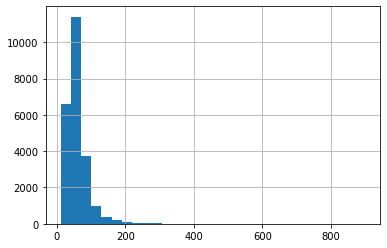

In [125]:
# площадь
data['total_area'].hist(bins=30)

Из диаграммы видим, что подавляющее большинство квартир имеют площадь менее 80 кв.м. Однако встречаются крайне редкие ситуации, когда  общая площадь более 200 кв.м.  
А что с жилой площадью?

<AxesSubplot:>

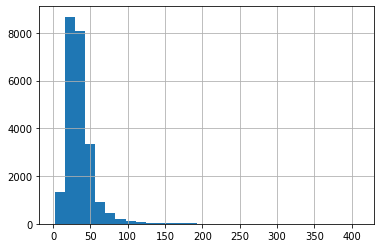

In [126]:
data['living_area'].hist(bins=30)

В большинстве случаев жилая площадь составляет менее 50 кв.м. Есть редкие случаи, когда жилая площадь более 90 кв.м.

Посмотрим на цену квартир.

<AxesSubplot:>

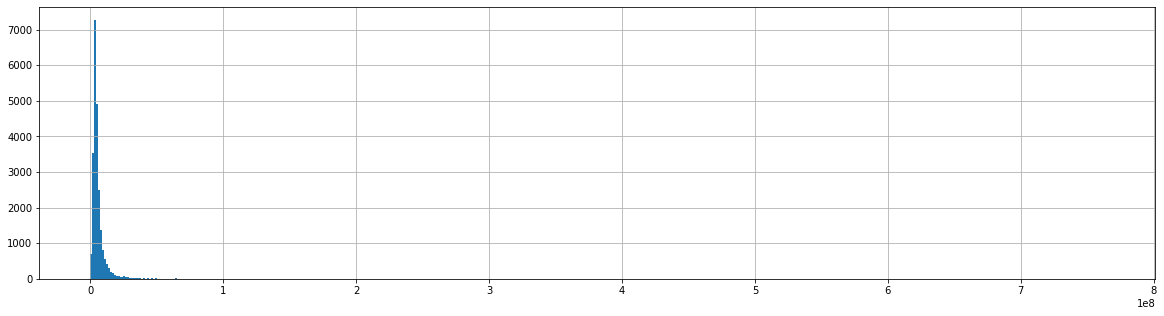

In [127]:
data['last_price'].hist(bins=500, figsize=(20,5))

По этой гистограмме можно заменить, что есть жилье стоимость которых очень близка к 0 (мин. значение примерно равно 12 тыс.), но есть редкие аномально большие (можно так сказать) значения. Попробуем другой способ визуализации.

<AxesSubplot:>

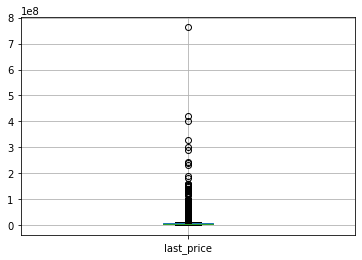

In [128]:
data[['last_price']].boxplot()

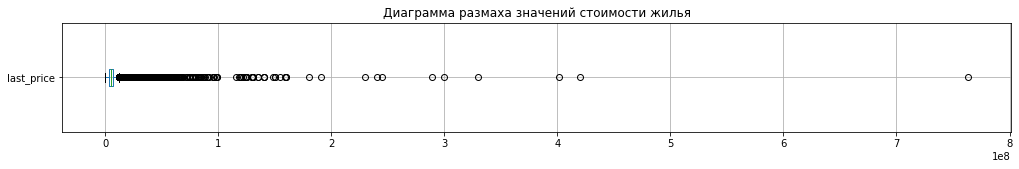

In [129]:
# check
# для примера горизонтальный вид диаграммы размаха

fig, ax = plt.subplots(figsize = (17,2))
ax = data[['last_price']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений стоимости жилья');
# ax.set_xlim(0, 400);

Видим из диаграммы размаха, что есть большие значения, когда стоимость превышает 100 млн. руб. (1e8 = 10^8), есть и за более чем 700 млн. руб. На эти данные нужно будет взглянуть более подробно.

In [130]:
data.loc[data['last_price'] >= 10**8]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,square_meter_price,weekday_exposition,month_exposition,year_exposition,floor_category,city_centers_category,ratio_living_area,ratio_kitchen_area
793,20,"135,000,000.00",310.00,2018-05-22,4,3.30,5.00,250.00,2,False,...,190.00,342.00,"435,483.87",Tuesday,May,2018,другой,близко к центру,0.81,0.16
1026,20,"155,000,000.00",310.00,2018-10-12,5,5.30,3.00,190.00,3,False,...,603.00,NaN,"500,000.00",Friday,October,2018,последний,центр,0.61,0.20
1188,20,"118,000,000.00",290.60,2018-06-01,6,3.82,6.00,188.70,3,False,...,NaN,316.00,"406,056.43",Friday,June,2018,другой,близко к центру,0.65,0.08
1300,14,"120,000,000.00",280.00,2018-07-12,5,4.70,4.00,162.00,3,False,...,339.00,225.00,"428,571.43",Thursday,July,2018,другой,центр,0.58,0.11
1436,19,"330,000,000.00",190.00,2018-04-04,3,3.50,7.00,95.00,5,False,...,285.00,233.00,"1,736,842.11",Wednesday,April,2018,другой,центр,0.50,0.21
1928,11,"125,000,000.00",224.50,2017-01-24,4,2.70,4.00,163.50,3,False,...,497.00,174.00,"556,792.87",Tuesday,January,2017,другой,центр,0.73,0.13
2243,9,"130,278,280.00",304.00,2015-07-24,5,3.11,9.00,NaN,7,False,...,NaN,599.00,"428,546.97",Friday,July,2015,другой,близко к центру,NaN,NaN
2536,16,"159,984,000.00",242.40,2015-08-27,4,3.85,9.00,131.00,7,False,...,227.00,501.00,"660,000.00",Thursday,August,2015,другой,центр,0.54,0.08
3117,19,"140,000,000.00",631.00,2019-03-30,7,2.70,5.00,NaN,5,False,...,210.00,NaN,"221,870.05",Saturday,March,2019,последний,центр,NaN,0.10
4996,20,"124,000,000.00",124.50,2017-10-12,4,3.00,4.00,67.20,2,False,...,172.00,45.00,"995,983.94",Thursday,October,2017,другой,центр,0.54,0.16


Мы видим, что и общая площадь у такого жилья довольно большая. Всего таких данных 34 (мене 1 %). Удалим их из нашего датасета

In [131]:
data.drop(data[data['last_price'] >= 10**8 ].index, inplace=True)

<AxesSubplot:>

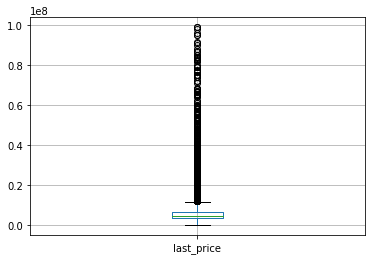

In [132]:
data[['last_price']].boxplot()

Все еще остается много выбросов. Посмотрим, какова доля сильных выбросов (значений, меньшие 25% квартили минус 3 * межквартильных размаха или больше 75% квартили плюс 3 * межквартильных размаха)

In [133]:
# посчитаем межквартиальный размах
q1 = data[['last_price']].quantile(0.25)
q3 = data[['last_price']].quantile(0.75)
iqr = q3 - q1

print(iqr)

last_price   3,350,000.00
dtype: float64


In [134]:
data['outlier'] = data['last_price'].apply(lambda x: True if ((x < (int(q1) - 2.5 * int(iqr))) or (x > (int(q3) + 2.5 * int(iqr)))) else False)

In [135]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,square_meter_price,weekday_exposition,month_exposition,year_exposition,floor_category,city_centers_category,ratio_living_area,ratio_kitchen_area,outlier
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,False,...,NaN,"120,370.37",Thursday,March,2019,другой,далеко от центра,0.47,0.23,False
1,7,"3,350,000.00",40.40,2018-12-04,1,2.70,11.00,18.60,1,False,...,81.00,"82,920.79",Tuesday,December,2018,первый,далеко от центра,0.46,0.27,False
2,10,"5,196,000.00",56.00,2015-08-20,2,2.70,5.00,34.30,4,False,...,558.00,"92,785.71",Thursday,August,2015,другой,далеко от центра,0.61,0.15,False
3,0,"64,900,000.00",159.00,2015-07-24,3,2.70,14.00,NaN,9,False,...,424.00,"408,176.10",Friday,July,2015,другой,близко к центру,NaN,NaN,True
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,False,...,121.00,"100,000.00",Tuesday,June,2018,другой,близко к центру,0.32,0.41,False


In [136]:
data.drop(data[data['outlier'] == True].index, inplace=True)

In [137]:
data.shape

(22320, 31)

В общей сложности избались от 5% аномальных данных (95% осталось).
Посмотрим, что получилось, а также посмотрим как удаления таких данных отразилось на параметре площадь.

<AxesSubplot:>

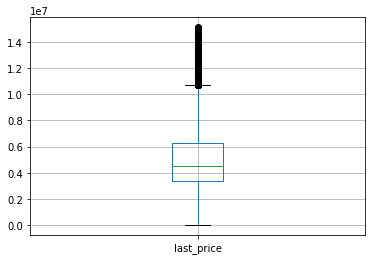

In [138]:
data[['last_price']].boxplot()

<AxesSubplot:>

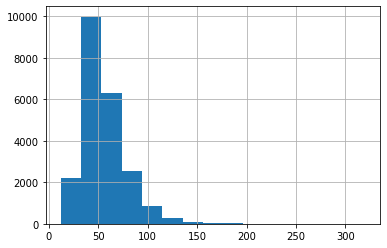

In [139]:
data['total_area'].hist(bins=15)

<AxesSubplot:>

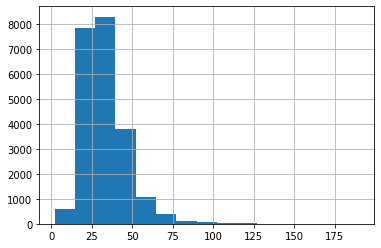

In [140]:
data['living_area'].hist(bins=15)

<AxesSubplot:>

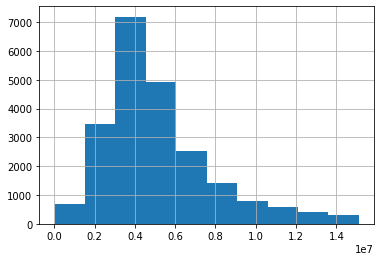

In [141]:
data['last_price'].hist(bins=10)

У нас остались только слабые выбросы. В целом теперь данные выглядят более наглядными. Видим, что большинство квартир стоят от 3 млн до 5 млн ден.ед. Распределение похоже на распределение Пуассона.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


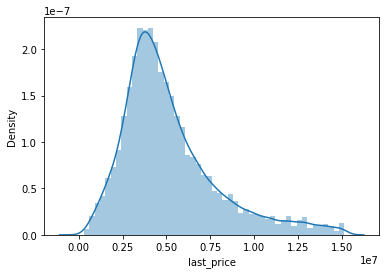

In [142]:
sns_plot = sns.distplot(data['last_price'])
fig = sns_plot.get_figure()

Распределение близко к нормальному со смещением вправо.

In [143]:
data['last_price'].describe()

count       22,320.00
mean     5,164,416.49
std      2,720,199.42
min         12,190.00
25%      3,370,000.00
50%      4,500,000.00
75%      6,300,000.00
max     15,120,000.00
Name: last_price, dtype: float64

Рассмотрим гистограммы высоты потолоков и числа комнат.

<AxesSubplot:>

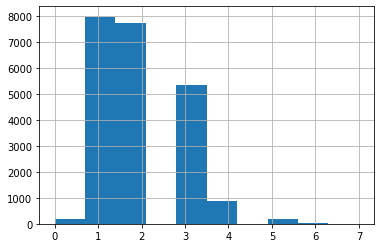

In [144]:
data['rooms'].hist()

<AxesSubplot:>

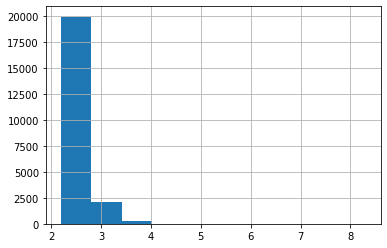

In [145]:
data['ceiling_height'].hist()

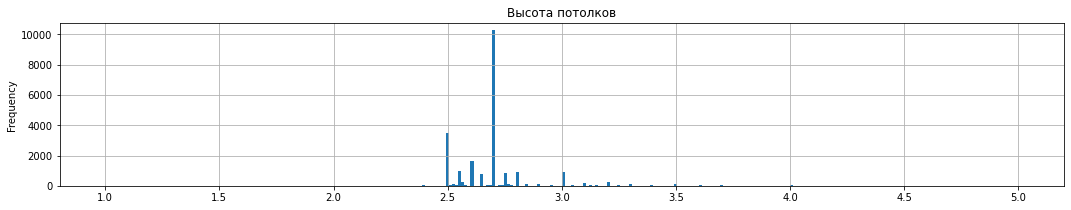

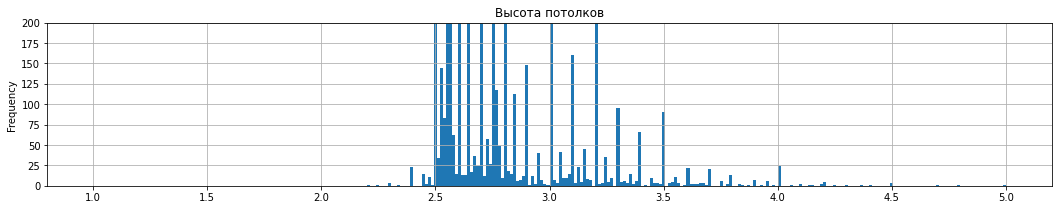

In [146]:
# check
# построим график значений для столбца с высотой потолков

(
    data['ceiling_height']
        .sort_values()
        .plot(y='ceiling_height', kind='hist', bins=300, range=(1,5), grid=True, title='Высота потолков', figsize=(18,3))        
)
plt.show()
(
    data['ceiling_height']
        .sort_values()
        .plot(y='ceiling_height', kind='hist', bins=300, range=(1,5), grid=True, title='Высота потолков', figsize=(18,3))
        .set(ylim = (0, 200))
)
plt.show()

In [147]:
data[['rooms', 'ceiling_height']].describe()

,rooms,ceiling_height
count,"22,320.00","22,320.00"
mean,1.98,2.70
std,0.95,0.20
min,0.00,2.20
25%,1.00,2.60
50%,2.00,2.70
75%,3.00,2.70
max,7.00,8.30


Итак, изучили параметры площади, цены, высоты потолков и числа комнат.

После удаления аномальных значений в `last_price` замечаем, что максимальное число комнат теперь равно 7. Чаще всего продаются одно- и двухкомнатные квартиры. 
Средняя высота потолков равно 2,7 м.

Изучим время продажи квартиры.  

Для этого построим гистограмму, посчитаем среднее и медиану. 

In [148]:
data['days_exposition'].describe()

count   19,513.00
mean       176.33
std        215.33
min          1.00
25%         44.00
50%         93.00
75%        224.00
max      1,580.00
Name: days_exposition, dtype: float64

В среднем жилье продается примерно за полгода. Но есть и такие объявления, которые были открыты больше 4-х лет. Возможно, что жилье было очень дорогим, а возможно, что продавцы забыли вовремя закрыть объявление. 
Медианное значени равно - 98 дням, что примерно 3 месяца.
Самая быстрая продажа жилья была проведена за 1 день :) (насколько такое значение реально???)

<AxesSubplot:>

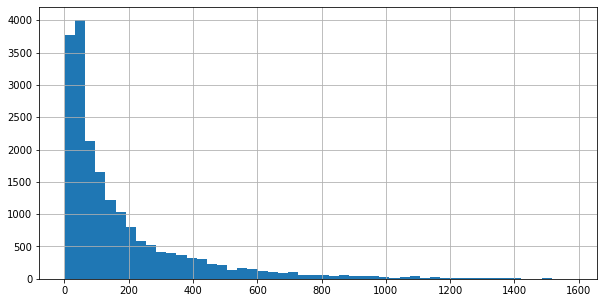

In [149]:
data['days_exposition'].hist(bins=50, figsize=(10,5))

Большая часть квартир продавалась в течение первых трех месяцев (100 дней), но есть квартиры, которые продавались больше года. Чем дальше, тем реже встречаются такие случаи.

Посмотрим на boxplot.

<AxesSubplot:>

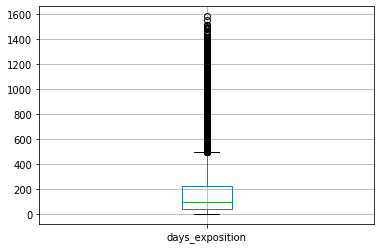

In [150]:
data[['days_exposition']].boxplot()

Избавимся от сильных выбросов.

In [151]:
q1 = data[['days_exposition']].quantile(0.25)
q3 = data[['days_exposition']].quantile(0.75)
iqr = q3 - q1

data['outlier_days'] = data['days_exposition'].apply(lambda x: True if ((x < (int(q1) - 2.5 * int(iqr))) or (x > (int(q3) + 2.5 * int(iqr)))) else False)

In [152]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,square_meter_price,weekday_exposition,month_exposition,year_exposition,floor_category,city_centers_category,ratio_living_area,ratio_kitchen_area,outlier,outlier_days
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,False,...,"120,370.37",Thursday,March,2019,другой,далеко от центра,0.47,0.23,False,False
1,7,"3,350,000.00",40.40,2018-12-04,1,2.70,11.00,18.60,1,False,...,"82,920.79",Tuesday,December,2018,первый,далеко от центра,0.46,0.27,False,False
2,10,"5,196,000.00",56.00,2015-08-20,2,2.70,5.00,34.30,4,False,...,"92,785.71",Thursday,August,2015,другой,далеко от центра,0.61,0.15,False,False
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14.00,32.00,13,False,...,"100,000.00",Tuesday,June,2018,другой,близко к центру,0.32,0.41,False,False
5,10,"2,890,000.00",30.40,2018-09-10,1,2.70,12.00,14.40,5,False,...,"95,065.79",Monday,September,2018,другой,None,0.47,0.30,False,False


In [153]:
data.drop(data[data['outlier_days'] == True].index, inplace=True)

In [154]:
data.shape

(21479, 32)

<AxesSubplot:>

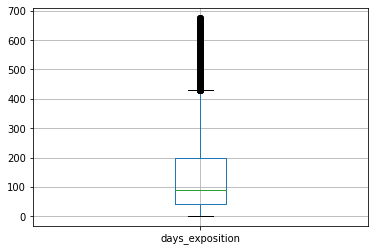

In [155]:
data[['days_exposition']].boxplot()

Избавились от сильных выбросов. Теперь максимальный срок продажи (закрытия объявления) составляет 700 дней (примерно 2 года).

<AxesSubplot:>

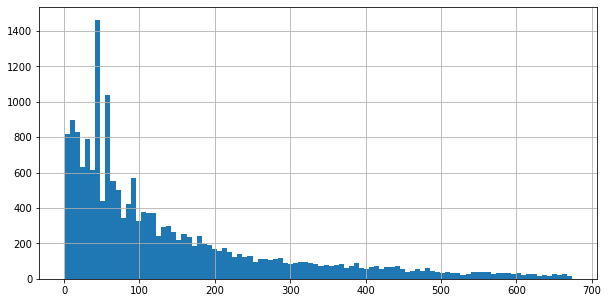

In [156]:
data['days_exposition'].hist(bins=100, figsize=(10,5))

In [157]:
data['days_exposition'].describe()

count   18,672.00
mean       143.21
std        145.99
min          1.00
25%         42.00
50%         88.00
75%        197.00
max        674.00
Name: days_exposition, dtype: float64

Итак, у нас все еще есть сделки, завершенные за 1 день. Также, по гистограмме видно, что есть некоторые выбвающиеся пики. 
Рассмотрим отдельно значения из первого и второго квартилей, и значения из третьего и четверого квартилей.

<AxesSubplot:>

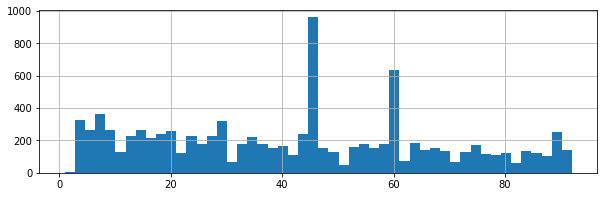

In [158]:
data.query('days_exposition<=92')['days_exposition'].hist(bins=50, figsize=(10,3))

<AxesSubplot:>

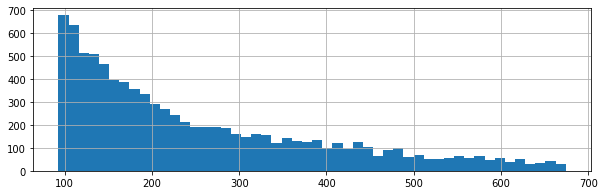

In [159]:
data.query('days_exposition>92')['days_exposition'].hist(bins=50, figsize=(10,3))

**Краткие выводы**: 
- Чаще всего объявления закрываются в первые 92 дня. Причем пики приходятся на 45 и 60 дни. Далее следует плавный спад длительности продажи. 
- После удаления сильных выбросов получили, что средняя стоимость жилья составляет приблизительно 5 млн, а медианная цена - 4,5 млн.
- Средняя общая площадь жилья равна 55 кв.м., а медианная - 50 кв.м., при этом средняя жилая площадь равна 31 кв.м.
- Высота потолков в среднем равна 2,7 м. Есть конечно жилье с высотой потолков 8.3, возможно это нежилые помещения или пентхаусы в элитном районе.

Избавимся от лишних переменных в датасете.

In [160]:
# избавимся от лишних переменных
data.drop(columns = ['outlier', 'outlier_days'], inplace=True)

Перейдем непосредственно к исследовательскому анализу.

## Исследовательский анализ данных

**Задание**: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года»

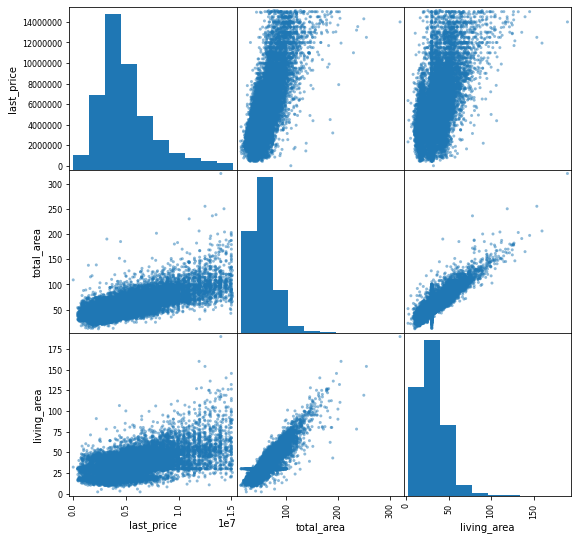

In [161]:
# Изучим связи между стоимостью жилья от общей площади и жилой площади
pd.plotting.scatter_matrix(data[['last_price', 'total_area', 'living_area']], figsize=(9, 9)); # посмотрим матрицу диаграмм рассеяния

Посмотрим на численные значения связи. Вычислим корреляции.

In [162]:
data['last_price'].corr(data['total_area'])

0.7424322597160489

In [163]:
data['last_price'].corr(data['living_area'])

0.609669845167934

*Вывод*: Из диаграмм рассеяния и значений корреляции видим, что цена связан с площадью, причем с общей площадью сильнее, чем с жилой площадью. Но эта разница могла возникнуть, что продаваемая недвижимость может относится к нежилым помещениям.

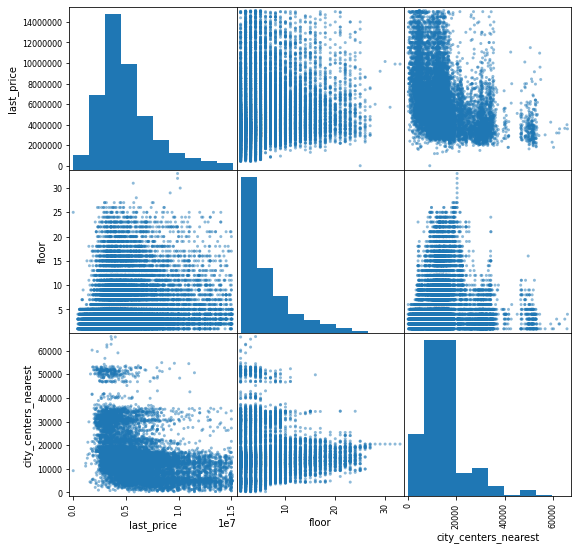

In [164]:
# Изучим связи между стоимостью жилья от числа этажей и удаленности
pd.plotting.scatter_matrix(data[['last_price', 'floor', 'city_centers_nearest']], figsize=(9, 9)); # посмотрим матрицу диаграмм рассеяния

*Вывод*: судя по диаграммам рассеяния можно предварительно сделать вывод, что цена жилья не зависит от этажа, не котором находится жилье, так же как, и от числа комнат. Любопытно, что прямая линейная связь между ценой и удаленностью жилья от центра также не наблюдается.

In [165]:
data['last_price'].corr(data['floor'])

0.11094223405394475

Корреляция также показывает, что связь между ценой и этажем низкая

In [166]:
data['last_price'].corr(data['city_centers_nearest'])

-0.35165143260237786

Корреляция между ценой и удаленностью от центра отрицательная, что и ожидалось увидеть (чем дальше от центра, тем ниже цена). Но корреляция слабая.

Возможно имеет смысл рассмотреть связь между стоимостью жилья и переменными `'floor_category'`, `'city_centers_category'`.

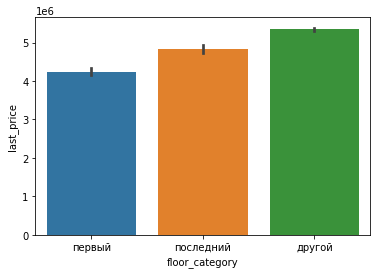

In [167]:
sns.barplot(x='floor_category', y='last_price', data=data, order=['первый', 'последний', 'другой']);

Видим, что есть разница в стоимости в зависимости от категории этажа. Но давайте посмотрим на наполненность категорий.

In [168]:
data['floor_category'].value_counts() 

другой       15788
последний     2970
первый        2721
Name: floor_category, dtype: int64

Наполненность крайних категорий "первый" и "последний" практически в 6 раз меньше, чем категории "другой".
Поэтому, ориентируясь на значение корреляции и диаграммые рассеяния, я бы сделала вывод, что стоимость жилья не зависит от этажа квартиры.

Обратимся к категории удаленность от центра. И сразу же посмотрим на наполненность категорий.

In [169]:
data['city_centers_category'].sort_values().unique()

array(['близко к центру', 'далеко от центра', 'пригород', 'центр', None],
      dtype=object)

In [170]:
data['city_centers_category'].value_counts()

далеко от центра    9875
пригород            2493
близко к центру     2392
центр               1460
Name: city_centers_category, dtype: int64

Довольно много недвижимости продается далеко от центра, категории "пригород" и "близко к центру" наполненны примерно одинаково. Очень мало недвижимость продается в центре населенного пункта.

<AxesSubplot:xlabel='city_centers_category', ylabel='last_price'>

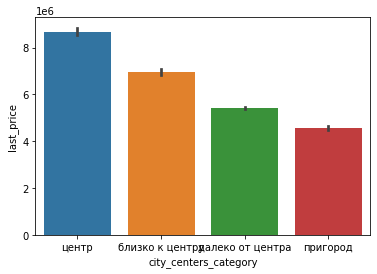

In [171]:
sns.barplot(x='city_centers_category', y='last_price', data=data, order=['центр', 'близко к центру', 'далеко от центра', 'пригород'])

Несмотря на то, что категория "центр" наименее наполненная, но цена недвижимости у этой категории намного выше, чем у других категорий. Точно также, следующая по дороговизне идет категория недвижимости "близко к центру" и у этой недвижимости цена намного выше, чем в пригороде. Категория "далеко от центра" самая наполненная, однако цена недвижимости есть меньше чем у жилья в центре или близко к центру, но выше, чем в пригороде.

Таким образом, можно делать вывод, что чем ближе к центру, тем цена на недвижимость возрастает.

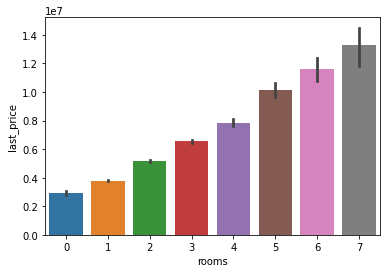

In [172]:
# осталось рассмотреть связаны ли цена и число комнат
sns.barplot(x='rooms', y='last_price', data=data);

На графике видим, что стоимость недвижимости возрастает по мере увеличения числа комнат. В приниципе, от числа комнат такде зависит и общая площадь жилья (график ниже).

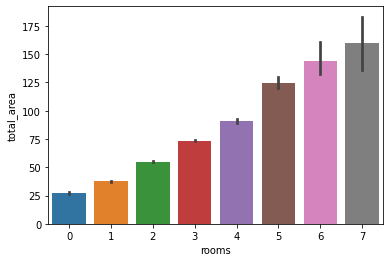

In [173]:
sns.barplot(x='rooms', y='total_area', data=data);

Поскольку параметры число комнат и общая площадь связаны друг с другом, то если стоит рассматривать связи либо между стоимостью и площадью, либо между стоимостью и числом комнат. Я предлагаю рассматривать связь между стоимостью и общей площадью.

**Кратикие выводы**:
1) Стоимость жилья положительно связана с его площадью. Чем больше площадь, тем выше цена.  
2) Стоимость жилья также связана с удаленностью от центра. Чем ближе к центру, тем выше цена.  
3) Цены на недвижимость не зависят от этажа.

Теперь изучим зависимость от даты размещения: дня недели, месяца и года.

In [174]:
# сначала отсотритуем дни по порядку
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=[ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
data['weekday_exposition'] = data['weekday_exposition'].astype(cat_type)

In [175]:
# посмтроим сводную таблицу
data_groupby_day = data.pivot_table(index='weekday_exposition', values='last_price', aggfunc='median')

In [176]:
data_groupby_day

,last_price
weekday_exposition,
Monday,"4,500,000.00"
Tuesday,"4,550,000.00"
Wednesday,"4,500,000.00"
Thursday,"4,500,000.00"
Friday,"4,450,000.00"
Saturday,"4,480,000.00"
Sunday,"4,450,000.00"


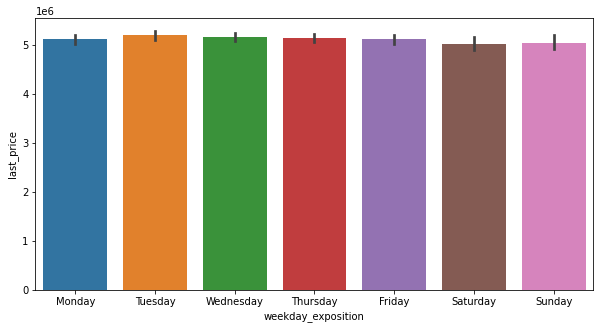

In [177]:
plt.figure(figsize=(10,5))

ax = sns.barplot(x='weekday_exposition', y='last_price', data=data);

Судя по графику и данным сводной таблицы сильных различий в цене в зависимости от дня недели нет.

In [178]:
cat_type = CategoricalDtype(categories=[ 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December'], ordered=True)
data['month_exposition'] = data['month_exposition'].astype(cat_type)

In [179]:
data_groupby_month = data.pivot_table(index='month_exposition', values='last_price', aggfunc='median')

In [180]:
data_groupby_month

,last_price
month_exposition,
January,"4,500,000.00"
February,"4,500,000.00"
March,"4,500,000.00"
April,"4,650,000.00"
May,"4,410,000.00"
June,"4,290,000.00"
July,"4,499,500.00"
August,"4,480,000.00"
September,"4,500,000.00"


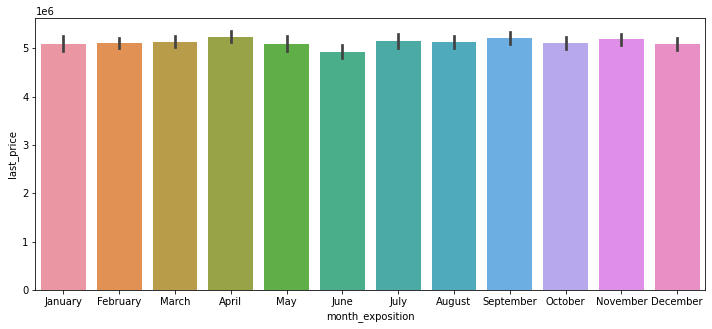

In [181]:
plt.figure(figsize=(12,5))

ax = sns.barplot(x='month_exposition', y='last_price', data=data)

Судя по графику и данным сводной таблицы сильных различий в цене в зависимости от месяца также нет. Наблюдается небольшое спад в июне, и повышение в апреле и сентябре. Но в целом, цена приблизительно одинаковая.

In [182]:
data_groupby_year = data.pivot_table(index='year_exposition', values='last_price', aggfunc='median')

In [183]:
data_groupby_year

,last_price
year_exposition,
2014,"7,265,000.00"
2015,"4,861,000.00"
2016,"4,350,000.00"
2017,"4,350,000.00"
2018,"4,500,000.00"
2019,"4,950,000.00"


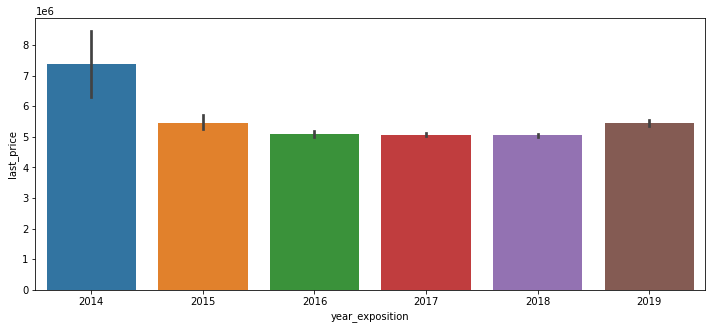

In [184]:
plt.figure(figsize=(12,5))

ax = sns.barplot(x='year_exposition', y='last_price', data=data)

Из диаграммы и таблицы мы видим, что в 2014 году недвижимость стояла намного дороже, чем после. Медианная стоимость жилья превышала 7 млн. ден.ед. Затем наблюдается спад цен до 2018 года. В 2019 цена на недвижимость несколько поднялась и достигла уровня 2015 года.

Посмотрим, есть ли разница в цене в 2014 году в зависимости от месяца. 2014 год был годом введения различных санкций и повышения цен практически на все. Это возможно также отразилось и на стоимости жилья. Ожидаю, что ценники повысылись после марта 2014 года.

In [185]:
data_groupby_2014 = data.query('year_exposition == 2014').pivot_table(index='month_exposition', values='last_price', aggfunc='median')

In [186]:
data_groupby_2014

,last_price
month_exposition,
November,"10,118,000.00"
December,"6,800,000.00"


Видим, что в 2014 году есть данные только по двум месяцам - ноябрь и декабрь. А сколько всего у нас данных по 2014 году?

In [187]:
data.query('year_exposition == 2014').shape[0]

39

Всего в 2014 году было опубликовано лишь 41 объявление. Этого очень мало, чтобы делать выводы по 41 данным кажется невалидным.

In [188]:
# посмотрим на наполненность по всем годам
data['year_exposition'].value_counts().sort_index()

2014      39
2015     637
2016    2287
2017    7686
2018    8119
2019    2711
Name: year_exposition, dtype: int64

Данных за 2015 год тоже мало. Больше всего объвлений размещено в 2017 и 2018 годах. Стоимость в эти два года не различаются. Стоимость квартир за 2016 год также не отличается от стоимости в 217 и 2018 годах. Есть различия в стоимости в 2015 и 2019 годах, они выше. Сопоставимы по наполненности 2019 и 2016 года, в 2019 стоимость жилья увеличилась по сравнению с 2016 годом.

Проверим за сколько месяцев опубликовано сообщений в 2019 году.

In [263]:
data.query('year_exposition == 2019').pivot_table(index='month_exposition', \
                                                  values='last_price', aggfunc=['median', 'mean','count']).head(6)

,median,mean,count
,last_price,last_price,last_price
month_exposition,,,
January,"4,900,000.00","5,427,375.62",404
February,"5,050,000.00","5,559,277.42",518
March,"4,899,500.00","5,448,512.77",830
April,"4,925,000.00","5,413,275.79",902
May,"4,950,000.00","5,710,141.16",56
June,NaN,NaN,0


In [262]:
data.query('year_exposition == 2016').pivot_table(index='month_exposition', \
                                                  values='last_price', aggfunc=['median', 'mean','count']).head(6)

,median,mean,count
,last_price,last_price,last_price
month_exposition,,,
January,"4,900,000.00","5,752,695.71",99
February,"4,470,000.00","4,854,346.46",206
March,"4,375,000.00","5,332,557.75",278
April,"4,425,000.00","5,087,917.00",360
May,"4,225,000.00","4,977,868.31",372
June,"4,300,000.00","5,013,017.65",394


Данные за 2019 год неполные, представлены только первые 5 месяцев. Сравним медианные значения за первые 5 месяцев в 2016 и 2019 годах.

In [191]:
data2 = data.query(('year_exposition == 2016 or year_exposition == 2019'))

In [192]:
data2 = data2.query('month_exposition in ["January", "February", "March", "April", "May"]')

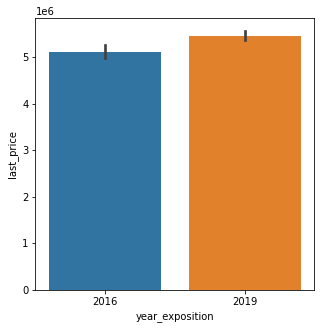

In [193]:
plt.figure(figsize=(5,5))

ax = sns.barplot(x='year_exposition', y='last_price', data=data2)

В 2019 стоимость жилья увеличилась по сравнению с 2016 годом, основной вывод остался прежним

In [194]:
# удалим лишние датасеты
del [[data_groupby_day, data_groupby_month, data_groupby_year, data_groupby_2014, data2, data3]]

**Краткие выводы**:  
1) Стоимость жилья разная в зависимости от года публикации объявления. После 2014 года наблюдается спад цен до 2018. В 2019 году ценники снова немного повысились и достигли уровня 2015 года. Однако, ориентируясь на наполненность категорий, можно сказать, что стоимость жилья в 2019 увеличилась по сравнению с предыдущими годама. Рассматривать данные по 2014 году кажется невалидным, поскольку данных за этот год всего 41 объявление.    
2) Стоимость недвижимости не отличается в зависимости от дня или месяца размещения объявления. По месяцам, конечно, наблюдается спад цен на жилье в июне, и рост в апреле и сентябре. Но думаю, что если проверить при статистических инструментов, то статистически значимых различий не будет. Об этом можно судить и по пересекающимся доверительным интервалам на диаграмме.

**Задание**: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».

In [195]:
data['locality_name'].value_counts()[:10]

Санкт-Петербург      13913
посёлок Мурино         497
посёлок Шушары         427
Всеволожск             379
Пушкин                 337
Колпино                329
посёлок Парголово      319
Гатчина                286
деревня Кудрово        278
Выборг                 223
Name: locality_name, dtype: int64

Наибольшее число объявлений в Санкт-Петербурге (более 13 тыс.). Далее идут поселки Мурино и Шушары. Меньше всего объявлений среди топ-10 в Выборге (всего 194).

Составим сводную таблицу, где сравним среднюю стоимость за квадратных метр в полученных населенных пунктах, а также сравним общую среднюю стоимость.

In [196]:
# выберем 10 населенных пунктов с наибольшим числом объявлений
locality_top10 = data['locality_name'].value_counts().index.tolist()[:10]

In [197]:
locality_top10

['Санкт-Петербург',
 'посёлок Мурино',
 'посёлок Шушары',
 'Всеволожск',
 'Пушкин',
 'Колпино',
 'посёлок Парголово',
 'Гатчина',
 'деревня Кудрово',
 'Выборг']

In [198]:
# посчитаем медианную цену квадратного метра в этих населённых пунктах
median_square_meter_price_top10 = [round(data[data['locality_name'] == name]['square_meter_price'].median(), 2) for name in locality_top10]

In [199]:
# посчитаем медианную цену жилья в этих населённых пунктах
median_last_price_top10 = [round(data[data['locality_name'] == name]['last_price'].median(), 2) for name in locality_top10]

In [200]:
# составим сводную таблицу 
frame = {'Населенный пункт': locality_top10, 'Средняя цена за кв.м., д.е.': median_square_meter_price_top10, 'Средняя цена за квартиру, д.е.': median_last_price_top10}
data_top10 = pd.DataFrame(frame).sort_values(by='Средняя цена за кв.м., д.е.', ascending=False)
data_top10

,Населенный пункт,"Средняя цена за кв.м., д.е.","Средняя цена за квартиру, д.е."
0,Санкт-Петербург,"102,827.76","5,250,000.00"
4,Пушкин,"99,431.82","5,100,000.00"
8,деревня Кудрово,"91,901.64","3,795,000.00"
6,посёлок Парголово,"91,428.57","4,100,000.00"
1,посёлок Мурино,"85,714.29","3,400,000.00"
2,посёлок Шушары,"76,923.08","3,990,000.00"
5,Колпино,"74,468.09","3,600,000.00"
7,Гатчина,"67,671.51","3,095,000.00"
3,Всеволожск,"65,686.27","3,480,000.00"
9,Выборг,"58,158.32","2,897,000.00"


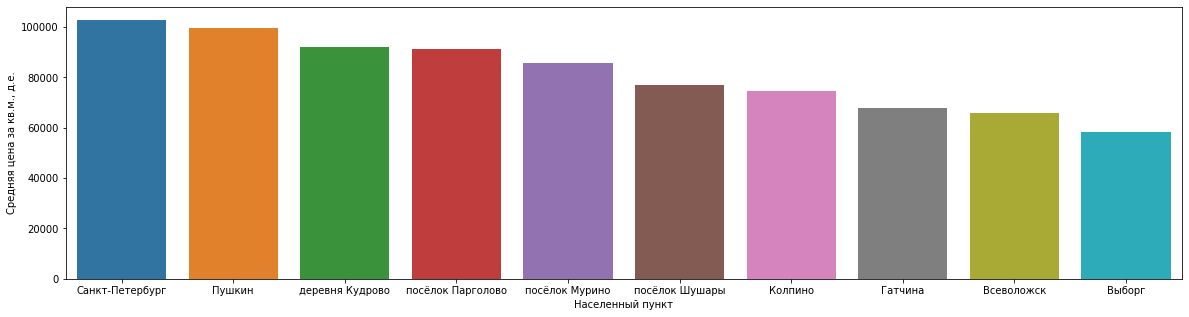

In [201]:
plt.figure(figsize=(20,5))

ax = sns.barplot(x='Населенный пункт', y='Средняя цена за кв.м., д.е.', data=data_top10)

**Краткие выводы**:  
1) Дороже всего недвижимость стоит в Санкт-Петербурге. Здесь медианная стоимость за кв.м. составляет 102857 ден.ед. Далее идет Пушкин и деревня Кудрово. Дешевле всего кв.м. недвижимости стоит в Выборге.  
2) Если смотреть на медианную стоимость в целом за недвижимость, то ситуация не сильно меняется. Дороже всего стоит в Санкт-Петербурге, дешеле - в Выборге. Однако, можно заметить, что например, в деревне Кудрово средняя стоимость за жилье ниже, чем в поселке Парголово, хотя кв.м. стоит в деревне дороже. Возможно, что площади недвижимости в деревне Кудрово меньше, чем в поселке.

In [202]:
# check TOP-10
pd.options.display.float_format = '{:,.2f}'.format
(
    data
    .groupby('locality_name')['last_price']
    .agg({'count', 'mean'})
    .sort_values(by = 'count', ascending = False)
    .head(10)
    
).sort_values(by = 'mean', ascending = False)


,mean,count
locality_name,,
Санкт-Петербург,"6,050,317.31",13913
Пушкин,"5,631,974.37",337
посёлок Парголово,"4,498,656.61",319
деревня Кудрово,"4,247,567.33",278
посёлок Шушары,"4,116,903.98",427
Колпино,"3,858,541.78",329
Всеволожск,"3,748,860.96",379
посёлок Мурино,"3,649,988.63",497
Гатчина,"3,497,878.88",286


In [203]:
#"\U0001F44D"

**Задание**: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».

In [204]:
# сохраним в отдельную таблицу срез данных
data_spb = data.query('locality_name == "Санкт-Петербург"').copy()

In [205]:
# создадим новую переменную - расстояние до центра в км
data_spb.loc[:, 'city_centers_nearest_km'] = (data_spb.loc[:, 'city_centers_nearest']/1000).round()

In [206]:
# проверим, что все верно округлилось
data_spb[['city_centers_nearest', 'city_centers_nearest_km']].head(5)

,city_centers_nearest,city_centers_nearest_km
0,"16,028.00",16.00
2,"13,933.00",14.00
4,"8,098.00",8.00
7,"11,634.00",12.00
9,"15,008.00",15.00


In [207]:
# посмотрим сколько у нас уникальных значений и их число
data_spb['city_centers_nearest_km'].value_counts().sort_index()

0.00       13
1.00      114
2.00      208
3.00      277
4.00      511
5.00      633
6.00      449
7.00      307
8.00      479
9.00      530
10.00     665
11.00    1082
12.00    1523
13.00    1386
14.00    1223
15.00    1478
16.00    1214
17.00     827
18.00     246
19.00     153
20.00      46
21.00     112
22.00     194
23.00      81
24.00      25
25.00      26
26.00      52
27.00       2
28.00       7
29.00       5
Name: city_centers_nearest_km, dtype: int64

Расстояние меняется от 0 до 29 км. Странным вглядит 0 км. Посмотрим ближе на эти 12 объявлений, возможно это погрешность округления.

In [208]:
data_spb[['city_centers_nearest', 'city_centers_nearest_km']].loc[data_spb['city_centers_nearest_km'] == 0]

,city_centers_nearest,city_centers_nearest_km
1182,208.00,0.00
1934,287.00,0.00
2609,399.00,0.00
2988,467.00,0.00
3800,472.00,0.00
5518,467.00,0.00
8239,387.00,0.00
8614,215.00,0.00
8677,376.00,0.00
9488,410.00,0.00


Расстояния действительно ненулевые. Оставим.

Посмотрим еще на скаттер-плот, и вычислим корреляцию.

<AxesSubplot:xlabel='city_centers_nearest_km', ylabel='last_price'>

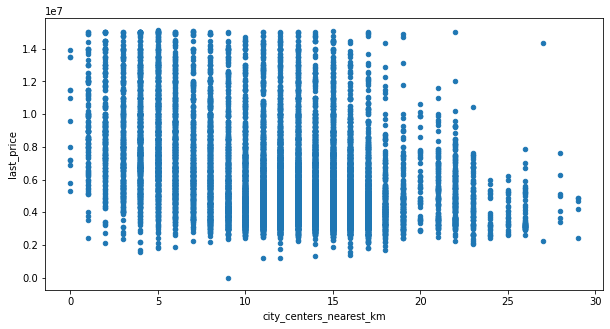

In [209]:
data_spb[['city_centers_nearest_km', 'last_price']].plot(x='city_centers_nearest_km', y='last_price', kind='scatter', figsize=(10,5)) 

In [210]:
data_spb['last_price'].corr(data_spb['city_centers_nearest_km'])

-0.3897363471831636

Судя по диаграмме рассеяния и по значениям корреляции - есть слабая отрицательная связь.

Рассчитаем среднюю стоимость для каждого километра и посторим график.

In [211]:
# посчитаем среднюю цену для каждого километра
data_spb_pivot = data_spb.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='median')

In [212]:
# поменяем тип индекса с числового на порядковый, чтобы построить бар-плот
data_spb_pivot.index = data_spb_pivot.index.astype(str)

In [213]:
data_spb_pivot[0:6].median() # медианная стоимость в самом центре (5 и менее км.)

last_price   8,550,000.00
dtype: float64

In [214]:
data_spb_pivot[11:].median() # медианная стоимость в отдаленных районах (более 10 км)

last_price   4,800,000.00
dtype: float64

In [215]:
data_spb_pivot.index

Index(['0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0',
       '10.0', '11.0', '12.0', '13.0', '14.0', '15.0', '16.0', '17.0', '18.0',
       '19.0', '20.0', '21.0', '22.0', '23.0', '24.0', '25.0', '26.0', '27.0',
       '28.0', '29.0'],
      dtype='object', name='city_centers_nearest_km')

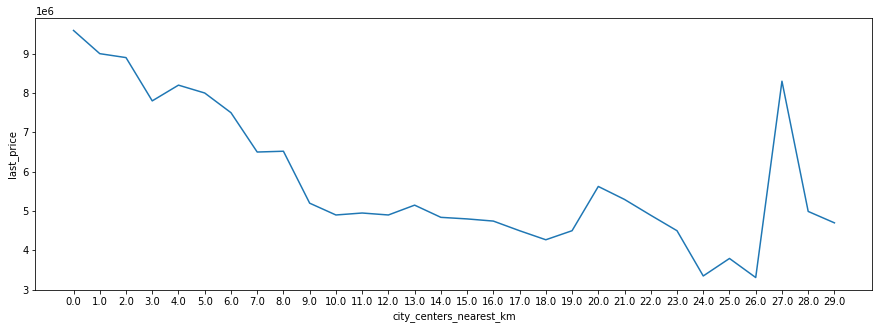

In [216]:
# построим график, чтобы стало понятнее
plt.figure(figsize=(15,5))

ax = sns.lineplot(x=data_spb_pivot.index, y='last_price', data=data_spb_pivot)

Видим, что чем ближе в центру, тем выше цена. Но есть и выбивающиеся значения для отдаленных районов. Напомним, что значений сильно отдаленных от центра города немного, например, всего две недвижимости находятся в пределах 27 км. от центра. 

Взглянем на эти значения, возможно, что их стоимость зависит от площади жилья.

In [217]:
data_spb.loc[data_spb['city_centers_nearest_km'] == 27]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,square_meter_price,weekday_exposition,month_exposition,year_exposition,floor_category,city_centers_category,ratio_living_area,ratio_kitchen_area,city_centers_nearest_km
748,13,"14,350,000.00",74.00,2017-11-28,2,3.13,5.00,30.00,3,False,...,128.00,"193,918.92",Tuesday,November,2017,другой,пригород,0.41,0.34,27.00
5961,6,"2,250,000.00",32.00,2018-02-27,1,2.70,2.00,16.50,2,False,...,178.00,"70,312.50",Tuesday,February,2018,последний,пригород,0.52,0.22,27.00


Среди этих двух объявлений есть большая двухкомнатная квартира с обзей площадью 74 кв.м.

Предлагаю сравнить среднюю стоимость за квадратный метр в зависимости от удаленности от центра.

In [218]:
data_spb['square_meter_price'].corr(data_spb['city_centers_nearest_km'])

-0.29622980498577495

<AxesSubplot:xlabel='city_centers_nearest_km', ylabel='square_meter_price'>

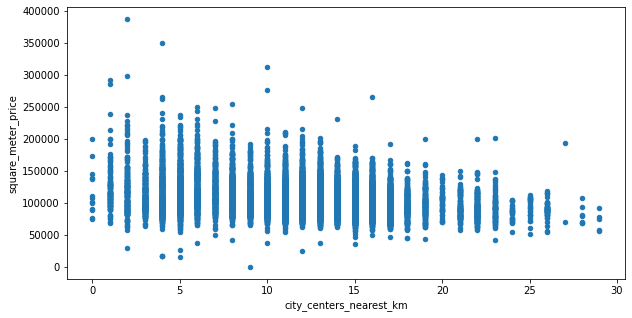

In [219]:
data_spb[['city_centers_nearest_km', 'square_meter_price']].plot(x='city_centers_nearest_km', y='square_meter_price', kind='scatter', figsize=(10,5)) 

Связь между этими параметрами еще ниже `:/`

In [220]:
# посчитаем среднюю цену для каждого километра
data_spb_pivot2 = data_spb.pivot_table(index='city_centers_nearest_km', values='square_meter_price', aggfunc='median')

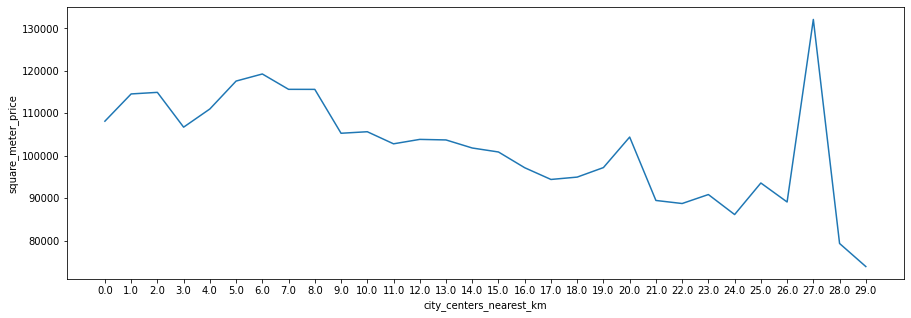

In [221]:
plt.figure(figsize=(15,5))

ax = sns.lineplot(x=data_spb_pivot2.index.astype(str), y='square_meter_price', data=data_spb_pivot2)

Если смотреть на график, то можно заметить, что средняя стоимость за кв. м. относительная высокая в пределах 8 км от центра, далее стоимость медленно снижается. Затем заметно повышение стоимости в районах удаленных от центра на 20 км, затем цена снова падает, и наблюдаем снова резкий прирост цены (которая даже больше чем в центре) в районе, находящемся на расстоянии 27 км от центра. 

Попробуем посмотреть как отличается средняя площадь квартир в завимости от удаленности от центра.

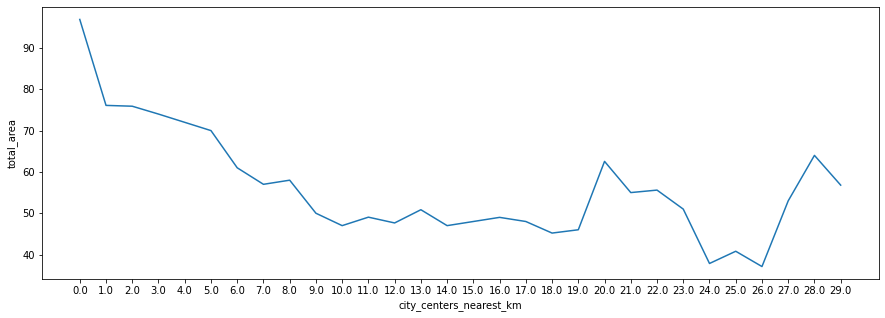

In [222]:
# посмотрим как отличается средняя площадь в зависимости от удаленности от центра
data_spb_pivot3 = data_spb.pivot_table(index='city_centers_nearest_km', values='total_area', aggfunc="median")
plt.figure(figsize=(15,5))
sns.lineplot(x=data_spb_pivot3.index.astype(str), y='total_area', data=data_spb_pivot3);

Видим, в пределах 5 км от центра площади недвижимости довольно большие. Ожидалось увидеть большую площадь для жилья на расстоянии 27 км, но в данном случае здесь нет выделяющегося пика. Но есть локальный пик в среднем размере площади на расстоянии 20 км от центра. Но этот локальный пик наблюдается и на остальных графиках.

**Краткие выводы**:  
1) По полученным данным мы видим, что средняя стоимость недвижимости в центре (до 5 км) выше, по сравнению с остальными районами. Однако, есть аномальное значение: квартира стоит так же дорого, как и в центре, но удалена от центра на 27 км. Что еще удивительнее, что средняя стоимость за кв.м. этого жилья выше, чем в центре. При этом общая площадь не отличается аномальным значением.  
2) Интересен тот факт, что общая площадь недвижимости в центре также выше, чем в остальных районах. При это средняя стоимость за квадратный метр в районе не сильно отличается, от аналогичной стоимости в районах "близко к центру" (до 10 км).  
3) Наблюдается более-менее равномерная картина по всем трем рассмотренным параметрам для района "далеко от центра" (10-20 км). 
Неравномерная картина для районов больше 20 км может быть связана с тем, что данных в них намного меньше, чем данных в категории "далеко от центра".

**Задание**: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»

Выделим сегмент квартир в зоне до 10 км включительно и проанализируем эту территорию. Повторим сделанный в первом задании алгоритм и изучим следующие параметры:
* площадь;
* цена;
* число комнат;
* высота потолков.

In [223]:
city_center = data.query('city_centers_nearest <= 8000').copy()

In [224]:
city_center['locality_name'].unique() # остался только Санкт-Петербург

array(['Санкт-Петербург'], dtype=object)

In [225]:
city_center[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,"2,661.00","2,661.00","2,661.00","2,661.00"
mean,71.80,"8,232,470.62",2.48,2.91
std,28.85,"2,958,212.36",1.13,0.33
min,12.00,"1,600,000.00",0.00,2.40
25%,50.00,"5,990,000.00",2.00,2.70
50%,68.00,"7,800,000.00",2.00,2.75
75%,87.50,"10,200,000.00",3.00,3.10
max,255.00,"15,120,000.00",7.00,5.80


**Выводы**. Из описательной статистки видим, что средняя площадь равно 72 кв.м. (медианная - 68).  Максимальная площадь продаваемой недвижимости в центре Санкт-Петербурга составляет 255 кв.м., а минимальная 12 кв.м.  
Средняя стоимость недвижимости в центре города равна примерно 8 млн, а чуть медианная меньше (7,8 млн). Самая дорогая недвижимость в центре культурной столицы, проданная с 2014 по 2019 год, стоит 15 млн., а самая низкая цена зафиксирована на 1,6 млн.  
Среднее число комнат равно 2, максимальное 7. 
Высота потолков в среднем равно 2,7-2,9 м. Самые высокие потолки - 5,8 м.

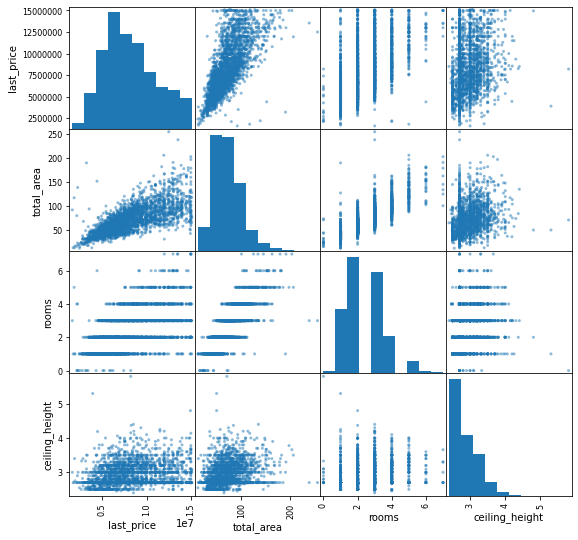

In [226]:
# построим матрицу диаграмм рассеяния
pd.plotting.scatter_matrix(city_center[['last_price', 'total_area', 'rooms', 'ceiling_height']], figsize=(9, 9));

In [227]:
names = ['total_area', 'ceiling_height', 'rooms']

for name in names:
    print(city_center['last_price'].corr(city_center[name]))

0.7091279955456156
0.20191521121818298
0.5097256254862846


In [228]:
city_center['rooms'].corr(city_center['total_area'])

0.8076190535454799

In [229]:
# check
city_center[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price']].corr()

,rooms,total_area,ceiling_height,days_exposition,last_price
rooms,1.00,0.81,0.20,0.13,0.51
total_area,0.81,1.00,0.25,0.17,0.71
ceiling_height,0.20,0.25,1.00,0.08,0.20
days_exposition,0.13,0.17,0.08,1.00,0.13
last_price,0.51,0.71,0.20,0.13,1.00


**Вывод**: Из диаграмм рассеяния и значений корреляции видим, что цена связан с площадью. Ситуация не сильно отличается от общей картины.  
По аналогии с тем, что было в задании, рассматривать корреляцию и связь между числом комнат и стоимостью кажется лишним, поскольку число комнат и общая площадь взаимосвязаны (коэффициент корреляции равен 0.8).  
Так же, как и в общем случае, связь между стоимостью и высотой потолков низкая.

Изучим, какие еще факторы связаны с окончательной стоимостью жилья в центре города.

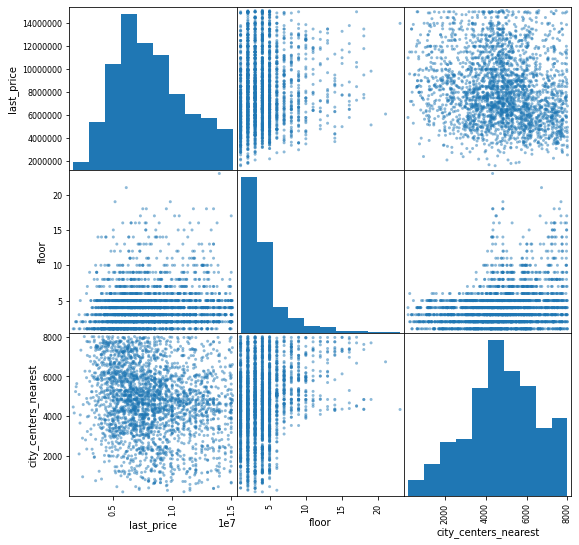

In [230]:
# рассмотрим корреляционные связи между ценой и этажем, удаленностью от центра
pd.plotting.scatter_matrix(city_center[['last_price', 'floor', 'city_centers_nearest']], figsize=(9, 9)); # посмотрим матрицу диаграмм рассеяния

**Вывод**: Здесь мы видим, что практически отсутсвует связь между расстоянием от центр и стоимостью жилья, что явно отличается от общей картины. Связь между этажем и ценой тоже низкая.

In [231]:
city_center[['last_price', 'city_centers_nearest', 'floor']].corr()

,last_price,city_centers_nearest,floor
last_price,1.00,-0.18,0.11
city_centers_nearest,-0.18,1.00,0.27
floor,0.11,0.27,1.00


Коэффициенты корреляции подтверждают данные на диаграммах.

Рассмотрим также есть ли разиличия в стоимости в зависимости от даты размещения: дня недели, месяца и года.

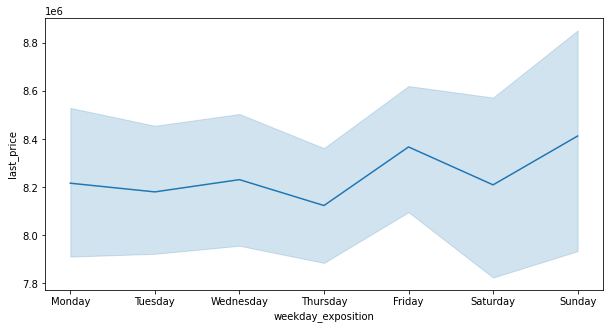

In [232]:
plt.figure(figsize=(10,5))

ax = sns.lineplot(x='weekday_exposition', y='last_price', data=city_center)

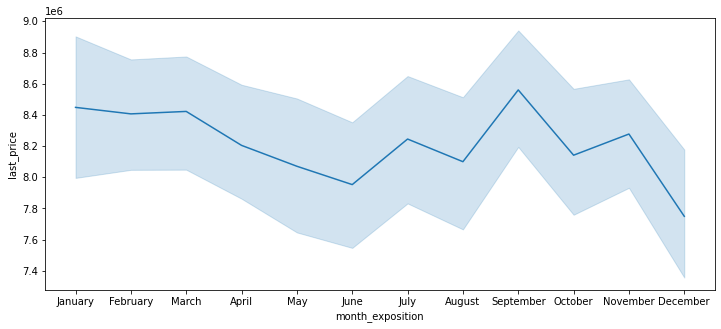

In [233]:
plt.figure(figsize=(12,5))

ax = sns.lineplot(x='month_exposition', y='last_price', data=city_center)

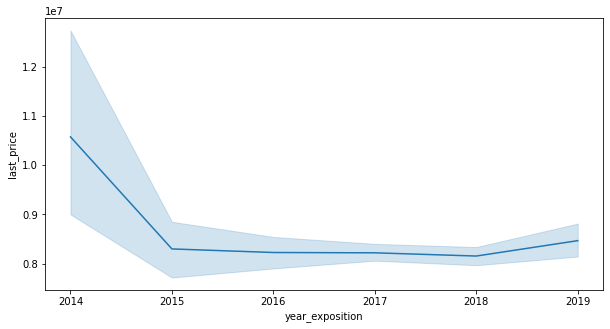

In [234]:
plt.figure(figsize=(10,5))

ax = sns.lineplot(x='year_exposition', y='last_price', data=city_center)

**Краткий вывод**:   
Ситуация по дням не отличается от общей картины. Стоимость жилья не связано с днем размещения объявления. По месяцам также не наблюдается сильных различий по стоимости, но в отличие от общей картины в данном сегменте стоимость в марте выше, по сравнению с апрелем (хотя доверительные интервалы пересекаются).  
Ситуация по годам следующая. На общем фоне сильно выделяется 2014 год, хотя помним, что в этом году есть данные только за 2 месяца (ноябрь и декабрь). Однако, средняя стоимость жилья в 2015 году не отличается от средней стоимости в 2016-2018 годах, и ниже, чем в 2019 году (в отличие от общей картины). В 2019 году ценники на недвижимость выросли, по сравнению четырьмя предыдущими годами, но не так сильно, как в общем случае.

## Общий вывод

В рамках этого проекта было выполнено четыре исследовательские задачи.  
1) При выполнении первого задания было обнаружено, что общая площадь недвижимости положительно связана с её стоимостью (коэффициент корреляции составил `0,75`). Следующим фактором, с которым связана стоимость оказалась удаленность от центра города. Связь слабая и отрицательная (коэффициент корреляции составил `-0,36`), иными словами чем дальше от центра, тем ниже стоимость. Практически отсутствует связь между этажем, на котором находится жилье, и его стоимостью (`0,11` - коэффициент корреляции). Такэе не обнаружено различий в стоимости в зависимости от дня недели или месяца. Однако сравнение стоимости по годам показывает, что цена увеличилась с `2016` по `2019` год (с `4350000` до `4950000` ден.ед.).  
2) Больше всего объявлений о продаже недвижимости выкладывали жители Санкт-Петербурга (за период с конца `2014` по `2019` год опубликовано `13272`, в остальных населенных пунктах объявлений опубликовано менее `470`). Среди `топ-10` населенных пунктов, которые разместили объявления, меньше всех опубликовали жители Выборга. Сравнение стоимости жилья среди `топ-10` населенных пунктов с наибольшим числом объявлений о продаже недвижимости дороже всего недвижимость в среднем стоит в Санкт-Петербурге (медианная стоимость - `5,2` млн. д.е., и около `103` тыс. за кв.м.). Далее идет Пушкин и деревня Кудрово. Дешевле всего недвижимость стоит в Выборге (медианная стоимость жилья - меньше `3` млн д.е., около `58` тыс. за кв.м.).  
3) Отдельно рассматривали стоимость жилья в Санкт-Петербурге. Так же как, и в общем случае, обнаружено, что чем ближе к центру, тем дороже стоит недвижимость. Средняя стоимость недвижимость в центре (до `5` км) составляет `8,5` млн. д.е., в то время как средняя цена в отдаленных районах (более `10` км) составляет `4,8` млн д.е. Стоит отметить, что обнаружено аномальные данные: в данных есть квартира, которая стоит так же дорого, как и в центре, но удалена от центра на `27` км. Что еще удивительнее, что средняя стоимость за кв.м. этого жилья выше, чем в центре, и это наряду с тем фактом, что общая площадь жилья не отличается аномальным значением. По району "далеко от центра" (`10-20` км) наблюдается более-менее равномерная картина по трем рассмотренным параметрам (общая площадь, стоимость жилья за кв. м., общая стоимость).  
4) Отдельно был рассмотрен сегмент квартир в центре и близко к центру (менее 10 км). По некоторым параметрам ситуации не отличаются от общей картины: так существеует прямая и положительная умеренная связь между общей стоимостью и общей площадью жилья (`0,71`), слабая связь между стоимостью жилья и высотой потолков (`0,20`), стоимостью жилья и этажем недвижимости (`0,12`), нет различий в стоимости жилья в зависимости от дня недели и месяца размещения объявления. Однако в отличие от общей картины, связь между стоимостью жилья и удаленностью от центра оказалось довольно слабой (`-0,18` против `-0,36`). Также обнаружены различия в стоимости по годам, несколько отличающейся от общей картины. Так, средняя стоимость жилья в `2015` году не отличается от средней стоимости в `2016-2018` годах, и ниже, чем в `2019` году (в отличие от общей картины). В `2019` году ценники на недвижимость выросли, по сравнению четырьмя предыдущими годами, но не так сильно, как в общем случае.

In [235]:
# Показатели о кол-ве объявлений в датасете, минимальных, средних, медианных и максимальных показателях 
# в выбранных параметрах о продаже квартир

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'square_meter_price']]
    .apply (['count', 'min', 'mean', 'median', 'max'])   
)

,rooms,total_area,ceiling_height,days_exposition,last_price,square_meter_price
count,"21,479.00","21,479.00","21,479.00","18,672.00","21,479.00","21,479.00"
min,0.00,12.00,2.20,1.00,"12,190.00",111.83
mean,1.97,54.93,2.70,143.21,"5,131,172.01","93,514.07"
median,2.00,50.00,2.70,88.00,"4,500,000.00","93,437.50"
max,7.00,320.00,8.30,674.00,"15,120,000.00","387,096.77"


Итак, в данных есть странные значения, что стоимость квадратного метра равна 111,83 руб. Посмотрим, что это за жилье.

In [236]:
data[data['last_price'] == 12190.00]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,square_meter_price,weekday_exposition,month_exposition,year_exposition,floor_category,city_centers_category,ratio_living_area,ratio_kitchen_area
8793,7,"12,190.00",109.00,2019-03-20,2,2.75,25.00,32.00,25,False,...,NaN,8.00,111.83,Wednesday,March,2019,последний,близко к центру,0.29,0.37


In [237]:
data.loc[data['last_price'] == 12190.00, "locality_name"]

8793    Санкт-Петербург
Name: locality_name, dtype: object

Очень странное объявление, общая площадь равна 109 кв.м., две комнаты, кватрира расположена недалеко от центра Санкт-Петербурга (!). Жилая площадь 32 кв.м. Настораживает!!! Ошибка пользователя или мошенники??? 
Избавимся от этого объявления и посмотрим на общую статистику еще раз.

In [238]:
data = data.loc[~(data['last_price'] == 12190.00)]

In [239]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'square_meter_price']]
    .apply (['count', 'min', 'mean', 'median', 'max'])   
)

,rooms,total_area,ceiling_height,days_exposition,last_price,square_meter_price
count,"21,478.00","21,478.00","21,478.00","18,671.00","21,478.00","21,478.00"
min,0.00,12.00,2.20,1.00,"430,000.00","7,962.96"
mean,1.97,54.93,2.70,143.22,"5,131,410.34","93,518.42"
median,2.00,50.00,2.70,88.00,"4,500,000.00","93,437.50"
max,7.00,320.00,8.30,674.00,"15,120,000.00","387,096.77"


In [240]:
data[data['last_price'] == 430000.00]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,square_meter_price,weekday_exposition,month_exposition,year_exposition,floor_category,city_centers_category,ratio_living_area,ratio_kitchen_area
14911,5,"430,000.00",54.00,2018-06-26,2,2.70,3.00,30.00,3,False,...,NaN,44.00,"7,962.96",Tuesday,June,2018,последний,None,0.56,0.39
17456,7,"430,000.00",30.40,2019-04-22,1,2.70,2.00,16.00,1,False,...,NaN,NaN,"14,144.74",Monday,April,2019,первый,None,0.53,0.20


In [241]:
data.loc[data['last_price'] == 430000.00, 'locality_name']

14911    посёлок станции Свирь
17456                   Сланцы
Name: locality_name, dtype: object

Таким низкие значения выглядят как правдивые. Посмотрим на описательную статистику в центре города.

In [242]:
(
    city_center[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'square_meter_price']]
    .apply (['count', 'min', 'mean', 'median', 'max'])   
)

,rooms,total_area,ceiling_height,days_exposition,last_price,square_meter_price
count,"2,661.00","2,661.00","2,661.00","2,278.00","2,661.00","2,661.00"
min,0.00,12.00,2.40,3.00,"1,600,000.00","15,345.27"
mean,2.48,71.80,2.91,169.21,"8,232,470.62","120,172.68"
median,2.00,68.00,2.75,109.00,"7,800,000.00","115,000.00"
max,7.00,255.00,5.80,674.00,"15,120,000.00","387,096.77"


Подозрительно, что самая низкая центра за квадратный метр в самом центре стоит 15,345.27 руб. В то время как нижняя квартильная цена составляет чуть более 96 тыс. руб.

In [243]:
city_center[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'square_meter_price']].describe()

,rooms,total_area,ceiling_height,days_exposition,last_price,square_meter_price
count,"2,661.00","2,661.00","2,661.00","2,278.00","2,661.00","2,661.00"
mean,2.48,71.80,2.91,169.21,"8,232,470.62","120,172.68"
std,1.13,28.85,0.33,160.72,"2,958,212.36","33,171.35"
min,0.00,12.00,2.40,3.00,"1,600,000.00","15,345.27"
25%,2.00,50.00,2.70,48.25,"5,990,000.00","96,366.51"
50%,2.00,68.00,2.75,109.00,"7,800,000.00","115,000.00"
75%,3.00,87.50,3.10,246.00,"10,200,000.00","138,461.54"
max,7.00,255.00,5.80,674.00,"15,120,000.00","387,096.77"


In [244]:
city_center[city_center["square_meter_price"] == city_center["square_meter_price"].min()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,square_meter_price,weekday_exposition,month_exposition,year_exposition,floor_category,city_centers_category,ratio_living_area,ratio_kitchen_area
17753,12,"1,800,000.00",117.30,2016-02-18,5,2.70,4.00,23.60,2,False,...,NaN,139.00,"15,345.27",Thursday,February,2016,другой,близко к центру,0.20,0.11


М-да, и тут странная ситуация, общая площадь 117,30 кв.м., жилая 23,60, при этом 5 комнат. Очень странное объявление. 

In [245]:
city_center = city_center.loc[~(city_center["square_meter_price"] == city_center["square_meter_price"].min())]

In [246]:
city_center[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'square_meter_price']].describe()

,rooms,total_area,ceiling_height,days_exposition,last_price,square_meter_price
count,"2,660.00","2,660.00","2,660.00","2,277.00","2,660.00","2,660.00"
mean,2.48,71.78,2.91,169.22,"8,234,888.84","120,212.09"
std,1.13,28.85,0.33,160.76,"2,956,136.77","33,115.22"
min,0.00,12.00,2.40,3.00,"1,600,000.00","15,861.57"
25%,2.00,50.00,2.70,48.00,"5,990,000.00","96,403.91"
50%,2.00,68.00,2.75,109.00,"7,800,000.00","115,000.00"
75%,3.00,87.43,3.10,246.00,"10,200,000.00","138,476.13"
max,7.00,255.00,5.80,674.00,"15,120,000.00","387,096.77"


Посмотрим на данные в `city_center`, которая находятся в первом квартиле по стоимости за квадратный метр, что на мой взгляд является более показательным параметром.

In [247]:
city_center['square_meter_price_label'] = (
    pd.qcut(data['square_meter_price'], q=4, labels=['маленькая', 'ниже медианного', 'выше медианного', 'большая'])
)

In [248]:
 city_center.query('square_meter_price_label == "маленькая"').shape

(91, 31)

Всего 96 записей. Посмотрим на описательную статистику.

In [249]:
(
    city_center[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 
                 'square_meter_price', 'square_meter_price_label']].
    query('square_meter_price_label == "маленькая"').describe()
)

,rooms,total_area,ceiling_height,days_exposition,last_price,square_meter_price
count,91.00,91.00,91.00,86.00,91.00,91.00
mean,3.56,112.30,2.98,202.19,"7,299,405.53","65,681.75"
std,1.33,43.23,0.37,173.38,"3,007,957.17","12,861.55"
min,1.00,38.10,2.45,3.00,"1,600,000.00","15,861.57"
25%,3.00,81.25,2.70,74.25,"4,975,000.00","63,989.99"
50%,3.00,104.00,2.80,168.00,"6,999,000.00","70,089.29"
75%,4.00,136.50,3.20,289.00,"9,300,000.00","73,051.62"
max,7.00,255.00,4.40,674.00,"14,990,000.00","75,177.30"


Итак, даже тут замечаем, что 25%-процентиль стоимости за квадратный метр равен 63989,99. Видимо, есть еще мошеннические объявления.

In [250]:
(
    city_center[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 
                 'square_meter_price', 'square_meter_price_label']].
    query('square_meter_price < 63989.99 and square_meter_price_label == "маленькая"')
)

,rooms,total_area,ceiling_height,days_exposition,last_price,square_meter_price,square_meter_price_label
2271,4,120.40,2.92,192.00,"7,480,000.00","62,126.25",маленькая
2489,3,255.00,2.70,102.00,"12,500,000.00","49,019.61",маленькая
3719,1,48.80,2.70,80.00,"3,100,000.00","63,524.59",маленькая
7728,4,88.70,2.70,75.00,"5,400,000.00","60,879.37",маленькая
7756,6,151.80,3.50,44.00,"4,390,000.00","28,919.63",маленькая
7923,2,57.00,2.80,484.00,"3,400,000.00","59,649.12",маленькая
8626,3,100.00,2.70,37.00,"5,400,000.00","54,000.00",маленькая
8646,3,94.00,2.70,6.00,"3,500,000.00","37,234.04",маленькая
11651,3,135.00,4.40,257.00,"8,500,000.00","62,962.96",маленькая
13739,4,80.00,2.70,23.00,"2,100,000.00","26,250.00",маленькая


Очень странными кажутся записи под номерами `2489`, `7756`, `8646`, `13739`, `19952`, `21338`, `23394`, `23606`. Общая площадь у этих квартир сравнительно большая, 3 из 4 объявлений были опубликованы не более 2-х недель, что настораживает. Возможно, что взбросы в ленту объявлений (https://www.cian.ru/stati-fejkovye-objavlenija-o-prodazhe-vychisljaem-zhulikov-312073/). Давайте от них избавимся и посмотрим еще раз на общую статистику.

In [251]:
city_center = city_center.loc[~(city_center["square_meter_price"] < 60000)]

In [252]:
city_center[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'square_meter_price']].describe()

,rooms,total_area,ceiling_height,days_exposition,last_price,square_meter_price
count,"2,646.00","2,646.00","2,646.00","2,263.00","2,646.00","2,646.00"
mean,2.48,71.47,2.91,169.76,"8,249,859.91","120,628.60"
std,1.12,28.22,0.33,160.81,"2,942,874.13","32,679.58"
min,0.00,12.00,2.40,3.00,"1,686,000.00","60,000.00"
25%,2.00,50.00,2.70,49.00,"6,000,000.00","96,666.67"
50%,2.00,68.00,2.75,110.00,"7,800,000.00","115,178.57"
75%,3.00,87.00,3.10,249.00,"10,200,000.00","138,645.06"
max,7.00,203.00,5.80,674.00,"15,120,000.00","387,096.77"


In [253]:
# посмотрим сколько стоит квартира с минимальной общей площадью
city_center.loc[(city_center["total_area"] < 16)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,square_meter_price,weekday_exposition,month_exposition,year_exposition,floor_category,city_centers_category,ratio_living_area,ratio_kitchen_area,square_meter_price_label
8886,10,"2,450,000.00",15.50,2018-08-22,0,2.70,5.00,10.00,2,False,...,27.00,"158,064.52",Wednesday,August,2018,другой,центр,0.65,0.30,большая
19546,3,"1,850,000.00",13.00,2019-03-11,1,3.40,5.00,30.00,2,False,...,24.00,"142,307.69",Monday,March,2019,другой,близко к центру,2.31,-1.36,большая
19558,2,"1,686,000.00",13.20,2018-12-17,1,2.70,5.00,30.00,1,False,...,19.00,"127,727.27",Monday,December,2018,первый,центр,2.27,-1.32,большая
19807,0,"3,800,000.00",13.00,2018-07-04,1,2.70,5.00,10.00,3,False,...,9.00,"292,307.69",Wednesday,July,2018,другой,центр,0.77,0.18,большая
19904,4,"2,400,000.00",12.00,2017-07-19,1,2.55,5.00,10.00,2,False,...,200.00,"200,000.00",Wednesday,July,2017,другой,центр,0.83,0.12,большая


М-да... В датасете `city_center` есть квартиры, где общая площадь менее 16 кв.м., но их стоимость довольно высокая, более 100 тыс. за кв.м. Может быть продается доля, может быть отдельная комната в квартире. А странно, что сроки публикации самой дорогой составили лишь 9 дней. Хм... 🤔  

Мне кажется, эти дома тоже следует иметь ввиду. Посмотрим еще раз на распределение общей стоимости квартир и цены за квадратный метр в датасете `city_center`

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


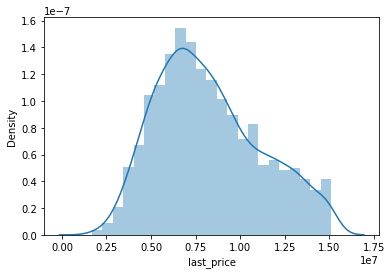

In [254]:
sns_plot = sns.distplot(city_center['last_price'])
fig = sns_plot.get_figure()

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


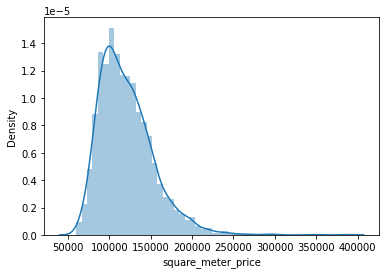

In [255]:
sns_plot = sns.distplot(city_center['square_meter_price'])
fig = sns_plot.get_figure()

Распределения близки к нормальным с положительным смещением.

Итак, благодаря дополнительному анализу, вроде бы как получилось обнаружить похожие на мошенничество объявления, которые сильно выбивались из общей картины. В основном такие объявления встречаются в Санкт-Петербурге. 